In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import numpy as np
import math
import random
import os
import shutil

def fontText(text, size):
    #fonts = files_txt = [file for file in os.listdir('C:\Windows\Fonts') if file.endswith('.ttf') or file.endswith('.TTF')]
    
    fonts = [
        'arial.ttf',
        'BOD_R.TTF',
        'BOOKOS.TTF',
        'calibri.ttf',
        'cambriab.ttf',
        'cour.ttf',
        'GOTHIC.TTF',
        'kaiu.ttf',
        'tahoma.ttf',
        'times.ttf',
        'trebuc.ttf',
        'verdana.ttf',
    ]

    try:
        os.makedirs('./image/', exist_ok = True)
        print('mkdir ./image/')
    except:
        print('mkdir ./image/')
    try:
        shutil.rmtree('./image/{}'.format(text))
        print('remove tree ./image/{}'.format(text))
    except:
        print('remove tree ./image/{}'.format(text))
    try:
        os.makedirs('./image/{}/'.format(text), exist_ok = True)
    except:
        print('mkdir ./image/{}/'.format(text))

    for i in range(len(fonts)):
        extraSize = 20
        font = fonts[i]
        scale = 0.8
        offsetX = 0
        offsetY = 0
        angle = 0
        print(font)
        

        try:
            # Create font
            pil_font = ImageFont.truetype(font, size=int(size*scale // len(text)), encoding="unic")
            text_width, text_height = pil_font.getsize(text)

            # create a blank canvas with extra space between lines
            canvas = Image.new('RGB', [size + extraSize, size + extraSize], (255, 255, 255))

            # draw the text onto the canvas
            draw = ImageDraw.Draw(canvas)
            offset = ((size + extraSize - text_width) // 2,
                      (size + extraSize - text_height) // 2 - text_height // 8)
            white = "#000000"
            draw.text(offset, text, font=pil_font, fill=white)
            rotatedCanvas = canvas.rotate(angle, expand=1, fillcolor = (255, 255, 255))

            rotatedOffset = int((size + extraSize) * (abs(math.cos(math.pi / 180 * angle)) + abs(math.sin(math.pi / 180 * angle))) / 2 - size / 2)
            rotatedOffsetX = rotatedOffset - offsetX
            rotatedOffsetY = rotatedOffset - offsetY
            rotatedCanvas = rotatedCanvas.crop((rotatedOffsetX, rotatedOffsetY, rotatedOffsetX + size, rotatedOffsetY + size))

            save_img('./image/{}/{}_G00.jpg'.format(text, font[:-4]), array_to_img(255 - np.asarray(rotatedCanvas)))
            save_img('./image/{}/{}_G06.jpg'.format(text, font[:-4]), array_to_img(255 - np.asarray(rotatedCanvas.filter(ImageFilter.GaussianBlur(radius = 0.5)))))
            save_img('./image/{}/{}_G12.jpg'.format(text, font[:-4]), array_to_img(255 - np.asarray(rotatedCanvas.filter(ImageFilter.GaussianBlur(radius = 1)))))
        except:
            print("An exception occurred")
    # Convert the canvas into an array with values in [0, 1]
    # return (255 - np.asarray(rotatedCanvas)) / 255.0

#plt.imshow(fontText("9", 28)[:,:,0:1])
for digit in range(1, 10):
    fontText("{}".format(digit), 28)

mkdir ./image/
remove tree ./image/1
arial.ttf
BOD_R.TTF
BOOKOS.TTF
calibri.ttf
cambriab.ttf
cour.ttf
GOTHIC.TTF
kaiu.ttf
tahoma.ttf
times.ttf
trebuc.ttf
verdana.ttf
mkdir ./image/
remove tree ./image/2
arial.ttf
BOD_R.TTF
BOOKOS.TTF
calibri.ttf
cambriab.ttf
cour.ttf
GOTHIC.TTF
kaiu.ttf
tahoma.ttf
times.ttf
trebuc.ttf
verdana.ttf
mkdir ./image/
remove tree ./image/3
arial.ttf
BOD_R.TTF
BOOKOS.TTF
calibri.ttf
cambriab.ttf
cour.ttf
GOTHIC.TTF
kaiu.ttf
tahoma.ttf
times.ttf
trebuc.ttf
verdana.ttf
mkdir ./image/
remove tree ./image/4
arial.ttf
BOD_R.TTF
BOOKOS.TTF
calibri.ttf
cambriab.ttf
cour.ttf
GOTHIC.TTF
kaiu.ttf
tahoma.ttf
times.ttf
trebuc.ttf
verdana.ttf
mkdir ./image/
remove tree ./image/5
arial.ttf
BOD_R.TTF
BOOKOS.TTF
calibri.ttf
cambriab.ttf
cour.ttf
GOTHIC.TTF
kaiu.ttf
tahoma.ttf
times.ttf
trebuc.ttf
verdana.ttf
mkdir ./image/
remove tree ./image/6
arial.ttf
BOD_R.TTF
BOOKOS.TTF
calibri.ttf
cambriab.ttf
cour.ttf
GOTHIC.TTF
kaiu.ttf
tahoma.ttf
times.ttf
trebuc.ttf
verdana.ttf
mkdi

In [3]:
batch_size = 1

try:
    os.makedirs('./TrainImage', exist_ok = True)
except:
    print('mkdir ./TrainImage')
    
for file in os.listdir('./TrainImage'):
    if file.endswith('.png'):
        os.remove('./TrainImage/{}'.format(file)) 
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        width_shift_range=0.06,
        height_shift_range=0.06,
        zoom_range=[1.2, 0.8])
test_datagen = ImageDataGenerator(
        rescale = 1./255,
        width_shift_range=0.06,
        height_shift_range=0.06,
        zoom_range=[1.2, 0.8])
train_generator = train_datagen.flow_from_directory(
        'image',
        color_mode="grayscale",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')
#        save_to_dir='./TrainImage',
#        save_prefix="",
#        save_format="png")
validation_generator = test_datagen.flow_from_directory(
        'image',
        color_mode="grayscale",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 324 images belonging to 9 classes.
Found 324 images belonging to 9 classes.


In [4]:
class FitCallBacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.995):
            self.model.stop_training = True;

fitCallbacks = FitCallBacks()


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(9, activation=tf.nn.softmax),
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [5]:
imageCount = 324

model.fit(
    x=train_generator,
    steps_per_epoch=imageCount  // batch_size,
    epochs=60,
    validation_data=validation_generator,
    validation_steps=imageCount  // batch_size,#)
    callbacks=[fitCallbacks])
model.fit(
    x=train_generator,
    steps_per_epoch=imageCount  // batch_size,
    epochs=60,
    validation_data=validation_generator,
    validation_steps=imageCount  // batch_size,#)
    callbacks=[fitCallbacks])

Epoch 1/60
324/324 [==============================] - 2s 7ms/step - loss: 2.0886 - accuracy: 0.2500 - val_loss: 1.5607 - val_accuracy: 0.6019
Epoch 2/60
324/324 [==============================] - 2s 5ms/step - loss: 1.0650 - accuracy: 0.6358 - val_loss: 0.5509 - val_accuracy: 0.8210
Epoch 3/60
324/324 [==============================] - 2s 5ms/step - loss: 0.5500 - accuracy: 0.8117 - val_loss: 0.5086 - val_accuracy: 0.8241
Epoch 4/60
324/324 [==============================] - 2s 5ms/step - loss: 0.3914 - accuracy: 0.8735 - val_loss: 0.3474 - val_accuracy: 0.9012
Epoch 5/60
324/324 [==============================] - 2s 5ms/step - loss: 0.3065 - accuracy: 0.8981 - val_loss: 0.1743 - val_accuracy: 0.9568
Epoch 6/60
324/324 [==============================] - 2s 5ms/step - loss: 0.1917 - accuracy: 0.9444 - val_loss: 0.1022 - val_accuracy: 0.9722
Epoch 7/60
324/324 [==============================] - 2s 5ms/step - loss: 0.1966 - accuracy: 0.9352 - val_loss: 0.1169 - val_accuracy: 0.9784
Epoch 

In [6]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('customMNIST.tflite', 'wb') as f:
    f.write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\mkleu\AppData\Local\Temp\tmpzp5to4go\assets


(28, 28)
(1, 28, 28, 1)
[[1.4179854e-08 4.5333575e-08 1.1339131e-05 7.4226868e-08 1.3813321e-06
  9.1844687e-04 1.8619444e-09 9.9905437e-01 1.4425404e-05]]
0.9990544
8


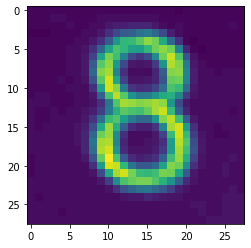

In [7]:
test = [
    [0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.16,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17],
    [0.17,0.17,0.17,0.18,0.18,0.17,0.17,0.17,0.17,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17],
    [0.17,0.17,0.17,0.17,0.17,0.18,0.17,0.17,0.18,0.18,0.20,0.21,0.21,0.22,0.22,0.22,0.20,0.18,0.17,0.18,0.17,0.17,0.17,0.17,0.17,0.17,0.18,0.17],
    [0.16,0.16,0.16,0.17,0.17,0.17,0.17,0.18,0.18,0.20,0.24,0.29,0.33,0.34,0.38,0.40,0.36,0.29,0.21,0.18,0.17,0.17,0.17,0.17,0.17,0.17,0.17,0.17],
    [0.17,0.17,0.17,0.17,0.17,0.17,0.18,0.18,0.20,0.24,0.33,0.47,0.55,0.56,0.60,0.65,0.62,0.52,0.36,0.24,0.17,0.16,0.17,0.17,0.17,0.17,0.17,0.17],
    [0.17,0.17,0.17,0.17,0.17,0.18,0.18,0.19,0.24,0.35,0.50,0.58,0.55,0.50,0.49,0.55,0.62,0.65,0.62,0.42,0.22,0.17,0.16,0.17,0.17,0.17,0.17,0.17],
    [0.17,0.17,0.17,0.17,0.17,0.18,0.18,0.20,0.28,0.50,0.63,0.57,0.42,0.29,0.25,0.29,0.44,0.62,0.70,0.59,0.31,0.19,0.17,0.17,0.17,0.17,0.17,0.17],
    [0.17,0.17,0.17,0.17,0.17,0.18,0.18,0.20,0.33,0.60,0.65,0.48,0.29,0.20,0.19,0.20,0.26,0.46,0.68,0.64,0.40,0.20,0.18,0.17,0.17,0.17,0.17,0.17],
    [0.17,0.17,0.17,0.17,0.17,0.18,0.18,0.20,0.36,0.64,0.67,0.43,0.24,0.18,0.18,0.18,0.22,0.33,0.64,0.65,0.43,0.21,0.18,0.18,0.17,0.18,0.18,0.18],
    [0.17,0.17,0.17,0.17,0.18,0.17,0.18,0.19,0.31,0.60,0.71,0.51,0.28,0.19,0.19,0.20,0.22,0.31,0.61,0.62,0.42,0.21,0.18,0.18,0.18,0.18,0.18,0.18],
    [0.17,0.17,0.17,0.17,0.17,0.18,0.18,0.18,0.24,0.50,0.71,0.64,0.40,0.25,0.23,0.24,0.28,0.37,0.58,0.56,0.36,0.20,0.18,0.18,0.18,0.18,0.18,0.18],
    [0.17,0.18,0.18,0.17,0.17,0.17,0.18,0.18,0.20,0.34,0.58,0.69,0.60,0.46,0.40,0.41,0.46,0.52,0.53,0.43,0.26,0.19,0.18,0.18,0.18,0.18,0.18,0.18],
    [0.18,0.18,0.18,0.17,0.17,0.17,0.18,0.18,0.19,0.24,0.39,0.59,0.67,0.66,0.64,0.65,0.67,0.65,0.47,0.29,0.20,0.18,0.18,0.18,0.18,0.18,0.18,0.18],
    [0.18,0.17,0.17,0.18,0.17,0.18,0.18,0.19,0.21,0.27,0.40,0.53,0.60,0.58,0.57,0.61,0.67,0.70,0.56,0.34,0.22,0.18,0.18,0.18,0.18,0.18,0.17,0.18],
    [0.18,0.17,0.17,0.18,0.18,0.18,0.18,0.20,0.25,0.38,0.56,0.59,0.49,0.40,0.36,0.36,0.47,0.64,0.69,0.57,0.33,0.20,0.18,0.18,0.18,0.18,0.18,0.18],
    [0.18,0.17,0.18,0.18,0.18,0.18,0.19,0.21,0.30,0.52,0.66,0.53,0.34,0.23,0.21,0.21,0.25,0.43,0.67,0.71,0.49,0.24,0.18,0.18,0.17,0.18,0.18,0.18],
    [0.18,0.18,0.18,0.18,0.18,0.18,0.19,0.22,0.36,0.62,0.66,0.44,0.24,0.18,0.18,0.18,0.20,0.28,0.56,0.71,0.56,0.27,0.19,0.18,0.17,0.17,0.18,0.18],
    [0.18,0.18,0.18,0.18,0.18,0.18,0.19,0.22,0.39,0.67,0.68,0.43,0.22,0.18,0.18,0.19,0.20,0.24,0.49,0.69,0.59,0.30,0.20,0.18,0.18,0.18,0.18,0.18],
    [0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.22,0.37,0.68,0.71,0.47,0.23,0.19,0.19,0.19,0.21,0.26,0.49,0.67,0.57,0.31,0.20,0.18,0.18,0.18,0.18,0.18],
    [0.17,0.18,0.18,0.18,0.18,0.18,0.18,0.20,0.31,0.61,0.75,0.58,0.33,0.23,0.21,0.22,0.24,0.34,0.57,0.66,0.53,0.28,0.19,0.18,0.18,0.18,0.19,0.18],
    [0.17,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.24,0.48,0.72,0.70,0.55,0.39,0.32,0.32,0.36,0.50,0.64,0.62,0.45,0.24,0.19,0.18,0.18,0.19,0.18,0.18],
    [0.17,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.19,0.29,0.52,0.67,0.71,0.63,0.56,0.55,0.57,0.63,0.62,0.51,0.33,0.20,0.18,0.18,0.18,0.19,0.18,0.18],
    [0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.20,0.27,0.45,0.58,0.61,0.63,0.63,0.59,0.54,0.46,0.34,0.23,0.19,0.18,0.18,0.18,0.18,0.18,0.18],
    [0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.19,0.24,0.31,0.35,0.38,0.39,0.36,0.32,0.27,0.21,0.19,0.18,0.18,0.18,0.18,0.18,0.19,0.18],
    [0.18,0.17,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.19,0.20,0.20,0.22,0.21,0.20,0.19,0.19,0.18,0.18,0.18,0.18,0.18,0.19,0.19,0.19],
    [0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.19,0.19,0.18,0.18,0.19,0.19,0.19],
    [0.18,0.18,0.18,0.18,0.17,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.19,0.18,0.18,0.19,0.19,0.19],
    [0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.19,0.19,0.19,0.19,0.19]
]
numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis]
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[5.10435321e-08 9.98707175e-01 5.78391837e-06 7.83358170e-11
  7.47912054e-07 1.05436895e-10 1.27536827e-03 1.67747856e-07
  1.07009955e-05]]
0.9987072
2


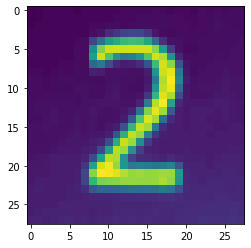

In [8]:
test = [[65,66,67,68,68,67,66,68,68,67,68,68,69,69,69,69,70,69,68,69,69,68,70,69,70,69,70,71],[65,66,68,68,68,68,67,68,68,68,68,69,69,69,70,70,70,70,70,70,69,69,70,70,71,70,70,70],[66,67,67,67,68,68,67,68,69,69,70,70,69,70,71,71,70,71,70,70,70,69,70,70,72,71,70,70],[67,67,67,67,67,68,68,68,71,74,84,90,97,100,99,90,75,70,69,70,70,70,70,70,71,71,71,71],[68,68,68,67,67,67,69,70,98,124,152,163,173,175,174,160,121,87,73,72,70,70,71,71,71,71,71,72],[68,68,67,67,67,68,70,70,142,193,212,214,212,213,214,214,196,153,94,73,69,69,70,71,71,71,72,73],[67,68,68,68,68,68,70,70,155,212,181,147,131,135,149,181,213,205,147,82,71,70,71,71,72,71,73,73],[68,68,68,68,69,69,70,70,119,129,103,83,78,79,85,105,174,214,196,107,74,71,71,72,73,73,73,73],[69,69,68,69,70,69,71,70,79,78,73,73,73,72,72,77,149,212,219,130,75,70,72,73,73,74,73,73],[70,70,69,70,71,71,70,71,70,70,72,73,72,72,71,75,130,205,223,139,77,72,73,73,74,75,74,74],[70,70,69,70,70,70,72,72,71,71,73,74,72,71,71,77,149,209,220,122,75,73,74,74,74,76,74,74],[70,70,71,71,71,71,71,72,71,71,74,75,72,72,74,91,170,217,203,103,76,73,73,74,76,76,75,74],[71,72,72,72,72,72,71,73,73,74,74,74,73,73,80,133,207,224,159,83,76,76,76,76,78,77,76,75],[71,72,72,74,72,72,73,73,75,73,72,73,75,80,125,194,219,201,111,78,76,77,77,77,76,77,76,75],[71,71,73,74,73,72,74,73,74,72,72,73,78,109,180,216,203,123,84,77,76,78,77,76,76,77,76,75],[72,73,74,73,72,72,74,73,74,72,75,78,106,170,211,203,131,85,77,77,76,77,77,77,76,76,77,77],[72,72,73,73,73,74,75,74,75,75,79,106,166,209,198,136,89,79,77,78,77,77,77,76,77,78,78,77],[73,72,72,73,74,75,75,75,77,80,103,164,210,200,143,92,79,78,78,78,78,77,78,78,78,77,77,77],[73,73,73,74,76,76,76,78,80,100,155,207,200,147,95,81,79,78,77,77,79,78,78,78,78,78,79,79],[74,75,76,77,77,77,77,80,102,157,206,205,148,98,86,84,82,81,84,80,79,79,79,78,79,80,80,80],[75,75,76,77,78,78,78,90,157,213,221,199,150,131,133,131,127,129,137,109,81,81,80,78,80,81,81,81],[75,76,76,77,77,77,79,99,195,224,221,216,206,199,201,197,199,201,200,153,83,81,81,80,81,82,82,81],[76,77,78,77,77,77,79,98,170,192,194,196,198,199,198,198,199,204,197,148,83,82,81,82,83,82,82,83],[78,79,78,77,78,79,80,86,108,117,117,118,121,124,124,125,123,129,126,105,84,83,83,83,83,82,82,83],[78,78,77,78,78,79,79,81,82,82,82,83,84,84,85,85,85,87,87,85,83,83,83,83,84,84,83,83],[78,78,78,78,80,81,81,80,80,80,80,82,82,82,82,82,83,84,84,83,84,84,84,85,85,85,85,85],[78,79,80,80,81,80,81,80,79,80,80,82,83,83,82,83,84,83,83,84,85,86,85,86,86,86,87,86],[80,80,79,81,82,83,81,82,81,82,83,84,83,84,83,84,83,83,83,85,85,86,88,87,87,87,88,87]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[4.6889226e-09 4.0118802e-09 1.8777474e-06 8.4909675e-12 9.9999762e-01
  1.3619334e-07 1.1245143e-11 2.3755349e-07 1.3675417e-07]]
0.9999976
5


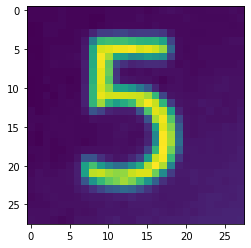

In [9]:
test = [[63,63,63,63,64,63,63,63,63,63,64,64,64,64,65,63,64,66,67,66,65,64,64,65,65,65,66,65],[63,63,63,63,64,63,63,63,62,62,64,64,64,64,66,64,65,65,65,65,66,65,64,64,64,64,65,66],[61,62,64,64,64,63,63,63,62,63,64,65,65,65,65,64,66,65,65,65,65,65,65,65,65,65,64,65],[61,62,64,64,63,63,64,66,77,88,89,92,93,87,88,88,89,85,70,65,65,64,64,65,65,65,65,65],[62,62,63,63,63,63,64,70,126,164,167,166,167,163,160,159,160,150,93,66,65,65,65,65,65,66,67,67],[61,61,63,64,64,64,64,72,154,205,207,210,210,212,205,208,203,191,111,66,64,65,66,66,66,66,66,66],[62,61,63,64,64,65,66,72,155,212,194,151,147,135,137,145,140,136,89,66,65,65,66,66,66,66,66,66],[62,62,63,65,64,64,65,74,156,211,177,96,82,76,78,80,80,79,69,65,66,65,65,66,66,66,66,67],[62,62,63,63,63,63,63,73,158,208,179,84,67,66,67,66,68,67,67,67,66,65,66,66,67,67,67,67],[61,62,64,63,63,62,63,73,159,208,174,85,70,69,68,68,66,63,66,67,66,66,67,67,68,69,68,68],[61,62,62,63,64,63,63,75,162,205,187,149,149,141,122,104,77,66,67,67,66,66,67,68,69,69,68,68],[61,62,64,62,64,63,64,75,162,209,203,204,204,203,202,193,163,93,69,68,67,67,67,68,68,67,68,68],[61,62,63,63,64,65,64,75,162,192,160,147,156,165,198,212,201,161,88,69,68,68,70,69,69,67,68,69],[64,62,63,64,64,64,65,70,101,91,76,73,73,74,99,171,207,201,148,76,68,67,68,70,68,69,68,70],[64,64,64,65,64,65,64,65,68,67,67,67,67,68,72,100,194,211,173,94,69,68,69,68,68,68,68,71],[65,63,64,65,65,65,64,64,64,66,66,67,69,68,67,80,149,208,185,106,69,68,69,69,69,71,70,72],[63,62,65,64,65,65,64,64,64,66,66,68,68,66,66,75,132,213,193,113,69,68,69,70,70,71,71,72],[63,62,65,63,64,65,64,63,64,66,66,67,67,66,68,76,133,213,194,116,70,70,70,71,70,71,71,72],[64,64,65,63,63,65,66,67,67,67,67,68,67,68,71,92,163,214,182,106,71,71,70,71,70,71,71,73],[63,64,65,63,64,65,69,101,100,82,73,69,70,77,89,143,201,212,164,86,70,71,71,71,71,71,72,73],[64,65,66,64,65,67,74,148,169,143,127,116,118,136,155,197,214,196,129,74,71,71,71,71,71,72,73,73],[65,67,66,66,67,68,74,148,199,201,192,188,189,201,206,206,180,134,88,72,72,73,72,72,73,73,74,74],[66,67,67,67,67,68,73,102,141,163,176,183,193,184,165,140,108,82,73,71,71,73,72,73,73,72,73,74],[66,67,68,67,67,67,71,74,83,93,103,107,114,110,97,84,75,71,71,71,71,71,72,72,73,73,74,75],[65,66,67,68,67,67,68,70,71,71,72,74,74,76,73,73,72,70,71,71,71,71,74,75,75,74,73,75],[66,66,66,67,68,68,68,68,69,69,71,70,69,72,72,72,71,71,70,71,72,73,74,75,74,74,75,75],[67,67,67,68,67,66,68,67,68,70,70,70,70,71,71,72,73,72,71,72,73,72,74,75,75,76,76,76],[68,67,67,66,64,66,69,69,69,70,72,74,70,70,73,73,72,73,74,74,74,75,76,76,76,76,76,77]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[4.9955954e-05 2.5424003e-04 2.9956056e-03 5.3139174e-06 7.6241500e-04
  9.8149781e-04 8.2050472e-05 9.8683375e-01 8.0352137e-03]]
0.98683375
8


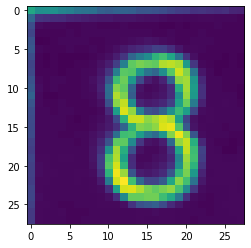

In [10]:
test = [[132,117,118,118,110,107,100,98,97,88,86,89,89,87,81,81,79,77,73,69,68,63,64,62,61,62,57,56],[92,64,62,60,59,56,55,53,52,51,51,49,49,49,48,47,47,46,45,45,44,44,45,45,44,44,44,43],[77,46,44,44,44,43,43,44,44,43,43,43,44,43,43,43,43,42,42,43,42,43,43,43,44,43,43,43],[73,43,43,43,43,44,43,44,44,44,44,44,44,44,44,44,43,43,44,43,43,43,44,43,43,43,43,43],[79,41,42,43,44,44,44,44,43,43,44,44,45,46,47,49,48,46,45,43,43,44,44,44,43,43,43,43],[82,44,43,43,43,44,43,43,44,43,45,47,51,56,59,63,70,69,61,50,45,45,44,43,43,43,43,43],[77,43,41,43,42,42,42,42,43,45,47,53,64,91,105,115,140,147,131,98,63,47,43,43,43,42,43,42],[73,43,42,43,42,42,43,43,44,48,53,69,107,155,162,158,156,175,178,173,124,65,44,43,42,42,43,42],[74,43,43,43,42,43,43,44,45,50,64,106,154,152,121,99,91,116,153,182,165,100,50,44,42,43,43,43],[79,45,43,44,44,43,43,44,47,53,80,145,159,122,75,53,48,56,89,167,172,121,58,44,44,43,43,43],[83,46,43,44,43,43,43,44,46,55,96,165,155,89,49,45,46,49,60,136,172,125,62,44,44,43,43,42],[89,45,42,42,43,43,43,44,45,52,94,175,163,85,47,46,48,50,60,117,169,123,62,44,44,44,44,42],[81,45,43,43,44,43,43,43,44,48,78,166,179,115,56,52,54,58,70,128,158,103,55,44,44,45,44,43],[77,44,44,43,44,44,43,43,43,45,59,126,185,168,108,79,76,90,117,144,126,73,46,45,44,44,44,44],[76,44,44,44,44,43,42,43,44,46,51,75,140,180,180,167,173,182,174,127,73,48,44,45,44,44,44,44],[75,44,44,44,44,43,43,43,45,48,52,62,90,140,164,161,167,185,188,151,83,49,45,44,44,43,44,44],[76,44,44,44,43,43,44,44,47,51,62,96,146,148,125,103,94,120,165,189,165,81,46,44,44,44,43,43],[71,44,44,44,44,44,43,44,48,57,80,155,155,113,65,49,47,53,93,168,180,137,58,45,43,43,42,43],[69,44,44,44,44,44,44,44,49,62,118,172,136,79,48,45,45,48,63,131,179,145,71,45,44,42,42,44],[72,45,45,44,45,45,44,44,49,68,149,175,128,60,45,45,47,49,58,111,170,147,69,45,45,44,44,45],[70,46,45,44,44,44,44,44,48,68,153,183,140,61,46,47,49,53,63,117,166,139,64,45,45,45,45,45],[70,46,45,45,44,44,45,45,46,62,140,190,170,81,53,51,54,59,81,141,162,122,56,44,45,45,45,45],[69,45,45,44,44,44,45,44,45,52,105,182,193,147,93,72,72,84,131,166,147,98,51,45,45,45,45,44],[72,45,44,44,44,44,44,44,45,46,61,128,183,185,174,162,156,162,168,149,114,65,46,44,44,44,45,44],[73,46,44,44,44,44,44,44,44,45,47,61,112,157,157,160,160,146,133,101,62,46,44,43,44,44,45,45],[70,45,45,44,43,43,44,44,44,45,45,45,47,63,78,83,87,76,59,51,45,44,43,43,44,45,45,45],[66,45,44,44,45,43,43,43,44,44,44,44,44,44,45,45,46,45,45,44,44,44,44,43,44,44,45,45],[66,45,44,44,44,43,43,44,44,44,44,44,44,44,45,44,44,45,45,44,44,43,44,44,44,44,44,45]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[9.5553502e-02 7.0906775e-03 8.9420867e-01 6.7347620e-04 2.3668986e-03
  6.6305851e-08 4.5091638e-05 2.7581189e-05 3.4111988e-05]]
0.89420867
3


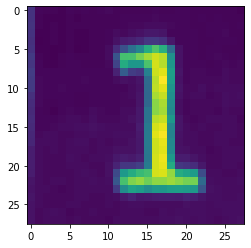

In [11]:
test = [[67,47,46,46,45,47,46,47,46,47,48,46,46,46,46,46,47,46,46,47,47,46,46,46,46,46,46,45],[67,46,45,45,45,46,45,46,46,46,46,46,47,47,47,47,48,47,47,47,47,46,47,46,47,46,46,46],[68,46,45,46,45,46,46,46,46,46,46,46,47,48,48,49,49,49,48,47,47,46,46,47,47,47,46,47],[67,45,45,46,45,46,45,45,46,46,47,49,48,50,52,54,54,53,47,47,47,47,46,47,47,48,46,46],[66,44,45,46,45,46,45,45,46,46,47,52,56,58,62,69,70,66,54,47,47,47,46,46,47,47,47,46],[67,45,45,44,45,46,44,45,46,46,49,64,83,102,117,143,159,144,100,52,47,47,46,47,47,46,46,46],[71,46,45,44,46,47,46,46,46,46,49,86,156,157,170,181,191,186,123,52,47,47,46,47,48,47,46,47],[69,47,45,45,46,47,47,46,46,46,48,76,142,128,128,158,192,185,128,52,47,47,47,46,47,48,47,48],[72,47,47,47,47,47,47,47,47,47,47,59,91,73,69,114,190,196,133,53,47,48,48,47,47,49,48,48],[71,48,47,47,47,47,47,48,47,47,47,49,51,50,53,99,186,203,132,52,47,48,48,48,48,49,48,48],[71,48,47,47,48,47,47,47,47,47,47,47,47,49,52,98,187,196,126,53,48,48,50,48,49,49,49,49],[66,48,47,47,47,47,46,46,47,47,47,47,48,49,53,97,182,189,123,52,48,49,49,47,48,50,49,50],[64,48,46,46,47,47,46,46,47,47,47,47,48,48,53,98,175,183,121,50,47,48,48,48,48,50,49,49],[63,47,46,45,47,48,47,47,49,48,47,47,49,49,54,105,175,181,118,50,47,48,48,48,47,49,48,48],[64,47,47,47,48,49,49,48,50,48,48,48,49,51,54,105,186,189,128,53,48,47,48,49,49,49,49,47],[63,47,47,48,49,49,50,50,51,50,49,49,49,49,56,109,193,197,116,53,49,48,49,48,48,49,49,48],[62,48,49,49,48,48,49,49,50,49,49,50,50,50,55,110,196,202,115,52,49,49,48,48,49,49,49,48],[61,49,49,49,48,49,50,50,48,49,48,49,49,51,54,110,191,197,118,51,49,49,48,48,49,49,48,48],[57,49,48,49,48,49,49,49,48,49,49,51,51,51,54,108,191,196,120,52,51,49,49,47,48,49,49,49],[57,49,48,48,48,50,49,48,49,49,50,54,56,55,58,107,192,199,129,56,56,53,50,48,48,49,49,49],[57,49,48,48,48,49,49,49,48,48,51,60,69,70,74,111,192,197,141,70,67,64,54,48,48,49,49,48],[56,49,48,48,48,48,49,50,49,48,51,80,130,142,151,156,192,194,177,142,136,131,81,49,49,48,48,49],[53,49,48,49,49,48,49,49,50,49,50,87,157,172,177,168,176,176,180,175,170,170,99,50,49,49,49,50],[52,49,49,48,47,48,49,49,49,49,49,71,122,136,132,122,129,128,133,134,132,129,86,51,50,49,49,49],[53,49,48,48,48,48,49,49,48,48,49,50,55,59,54,55,56,57,57,56,59,57,53,50,50,49,49,50],[52,49,48,48,48,49,49,48,48,48,49,48,49,50,50,49,49,49,49,49,51,50,50,49,50,50,50,50],[52,48,49,50,49,47,48,48,49,48,48,48,49,49,49,48,48,50,49,50,50,50,50,49,49,50,50,50],[52,48,49,49,49,48,49,48,48,48,47,49,49,49,49,49,49,50,50,51,50,49,50,49,48,49,50,51]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[3.6512804e-09 5.1918872e-11 1.1044415e-06 7.5058543e-10 9.9999666e-01
  1.0250852e-06 6.6986282e-13 1.1915399e-06 6.4020886e-09]]
0.99999666
5


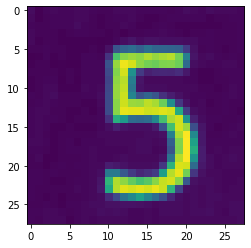

In [12]:
test = [[70,65,68,69,68,68,69,69,68,67,67,69,69,69,68,68,68,68,67,68,70,69,68,70,69,69,69,68],[69,65,67,68,68,68,69,69,67,66,67,68,68,69,67,66,66,67,68,68,68,68,68,66,67,67,68,68],[68,67,67,68,68,68,70,68,67,66,67,67,69,68,66,66,67,68,67,66,66,66,66,66,66,67,67,68],[69,67,67,67,66,67,68,68,67,67,66,67,65,67,67,68,68,69,68,67,66,67,67,68,67,67,67,68],[69,66,67,67,66,66,66,66,66,65,66,68,71,74,70,72,72,71,71,71,70,70,68,68,67,67,67,68],[67,67,68,67,67,66,66,66,67,66,72,106,117,121,113,124,116,116,115,113,92,72,67,68,67,66,67,68],[65,66,68,66,67,66,66,68,68,67,89,179,196,200,197,205,199,203,206,191,134,74,69,70,68,67,68,67],[66,67,67,65,66,65,65,68,68,68,105,199,220,214,197,191,188,193,194,189,120,71,69,68,68,69,69,67],[67,67,67,67,66,67,66,68,68,68,100,194,213,145,92,79,82,83,82,85,75,68,66,66,67,68,68,68],[66,67,68,68,65,67,65,68,68,68,97,197,207,132,74,69,69,69,69,69,68,68,66,66,67,67,68,68],[66,67,69,69,66,66,66,69,68,69,99,199,209,127,73,70,70,70,69,69,69,69,67,67,66,67,69,68],[68,67,69,70,67,67,67,68,68,70,101,199,211,137,106,116,107,87,78,72,69,68,68,67,67,68,69,68],[67,68,69,68,67,67,67,66,66,69,101,196,212,200,199,208,203,188,143,91,73,68,69,66,67,68,67,67],[68,69,69,67,67,66,66,67,65,68,101,196,218,217,217,212,213,216,213,162,93,71,69,67,67,68,67,66],[68,69,68,68,67,66,67,67,67,68,87,165,151,121,119,122,140,177,204,212,146,79,70,68,68,67,67,68],[68,69,68,66,66,67,66,66,66,68,71,78,73,71,71,71,76,106,176,213,200,103,74,68,66,67,68,69],[68,69,67,66,67,67,67,67,67,69,69,69,69,69,69,70,70,72,133,204,223,140,75,67,67,68,69,68],[69,69,68,66,67,68,66,68,68,68,69,69,69,69,70,70,69,70,113,194,224,156,75,68,68,68,68,68],[68,68,67,66,67,68,68,68,69,68,68,68,68,69,70,70,68,69,106,193,224,164,77,68,69,68,69,69],[67,69,65,66,67,67,67,68,69,68,68,69,70,69,69,69,69,73,126,206,224,146,77,70,68,69,70,69],[67,67,65,67,68,67,68,68,69,69,78,75,73,70,70,70,71,91,168,215,214,120,75,70,68,69,69,69],[68,68,67,68,67,67,67,68,69,71,130,130,109,92,83,87,93,154,206,219,190,90,72,69,69,68,68,68],[68,68,67,66,66,67,68,68,69,74,169,205,197,186,177,183,196,210,214,196,108,72,70,70,69,68,68,69],[68,67,67,67,67,67,69,68,69,75,161,206,216,213,217,213,219,211,169,97,71,70,69,70,69,68,69,69],[68,67,66,67,65,67,67,68,69,70,84,100,127,139,155,137,122,104,82,71,69,70,69,70,70,69,69,69],[67,67,68,67,66,68,68,69,70,70,72,72,73,73,72,71,69,70,70,70,69,70,69,70,69,69,70,70],[68,68,69,69,68,67,68,69,69,71,70,71,70,68,68,69,68,70,70,70,69,70,70,71,69,68,70,70],[68,67,69,69,69,66,68,69,68,69,69,69,69,68,68,69,68,69,69,69,69,69,69,69,69,69,69,70]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[1.1523972e-09 9.7988337e-09 6.3344360e-06 1.5827717e-09 1.1602627e-06
  5.2460990e-05 1.7729032e-10 9.9993074e-01 9.3333683e-06]]
0.99993074
8


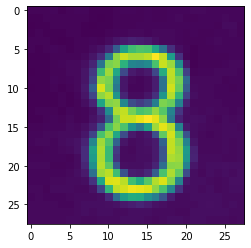

In [13]:
test = [[50,50,50,51,49,50,51,51,49,49,49,50,51,51,50,51,50,50,51,51,51,52,52,51,51,51,51,51],[49,49,50,50,50,50,50,50,49,48,49,50,50,50,50,51,50,50,51,52,50,50,51,51,51,52,51,51],[48,49,49,50,50,50,50,49,48,49,49,50,50,50,51,51,51,51,51,51,51,51,51,51,50,53,53,50],[49,50,49,49,49,50,50,49,49,49,50,51,51,52,52,51,52,52,52,51,50,51,50,50,51,51,52,50],[50,50,50,49,48,49,50,50,51,50,53,57,60,63,61,59,55,52,52,51,50,50,50,51,52,51,51,51],[50,49,50,51,50,49,50,50,53,56,67,97,142,161,166,164,144,110,70,54,51,49,50,50,51,51,51,51],[49,49,49,50,50,50,50,52,57,69,116,183,198,190,190,195,210,196,138,71,50,49,50,50,50,50,51,51],[49,49,49,50,51,52,52,55,65,110,178,182,153,122,119,125,164,197,186,127,59,49,50,50,50,51,52,52],[48,49,49,50,50,52,52,57,75,159,188,146,84,60,56,59,83,149,195,164,79,50,51,51,52,52,52,51],[49,49,49,51,50,51,52,57,82,184,179,121,58,52,51,53,61,110,194,177,103,52,52,52,52,50,51,51],[48,49,49,50,49,50,52,59,98,201,176,113,58,51,51,53,61,110,199,173,95,53,52,52,51,51,50,51],[49,49,49,49,50,49,51,57,82,183,192,133,65,53,53,57,70,133,192,155,80,54,52,52,51,51,51,51],[49,49,49,49,50,49,50,54,64,143,181,184,123,86,77,86,118,179,174,120,63,52,52,52,52,51,51,51],[49,50,50,50,49,51,50,51,54,72,127,191,196,177,164,168,184,168,121,74,55,53,52,53,52,52,51,52],[49,49,50,51,50,52,50,51,56,63,102,176,198,198,205,211,204,184,113,64,54,55,54,52,51,53,52,53],[50,50,51,51,51,53,52,55,62,90,164,182,165,131,114,142,187,204,193,121,59,54,53,52,52,53,53,52],[51,51,52,52,53,53,53,58,81,164,183,145,86,59,55,58,87,171,200,166,89,54,52,51,52,53,53,53],[51,52,52,51,53,54,56,64,123,188,166,99,57,53,54,56,60,99,196,181,120,57,52,52,52,53,52,53],[50,50,51,51,52,53,56,69,141,191,158,75,53,52,54,55,60,90,196,185,137,63,52,52,52,53,52,53],[51,51,51,51,51,50,53,69,138,190,158,71,53,53,54,54,60,91,191,187,134,64,53,53,53,52,52,53],[52,52,52,50,50,51,53,65,129,192,170,92,55,54,54,56,64,106,182,183,120,58,53,54,54,55,54,54],[51,51,51,51,51,52,54,60,108,187,194,161,89,61,60,66,96,164,191,172,86,54,52,54,53,54,53,55],[51,51,51,52,52,53,53,54,72,144,202,203,194,161,147,168,192,202,181,121,58,54,54,53,52,53,55,55],[52,52,50,53,53,53,52,52,56,83,156,195,200,207,205,202,183,164,123,72,54,54,53,54,52,53,54,54],[51,52,51,51,51,52,53,53,53,54,67,107,139,148,147,130,117,91,61,53,53,54,54,54,54,53,53,53],[52,52,52,52,51,51,53,54,54,54,55,56,59,62,65,61,56,55,53,53,53,53,54,55,54,53,54,53],[52,52,52,52,52,52,53,54,53,54,54,53,53,54,54,54,53,53,53,52,52,54,54,54,54,54,53,53],[52,52,52,52,52,53,53,52,52,53,53,53,54,54,54,53,52,53,54,54,53,54,54,53,53,53,52,53]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.07284454 0.09040253 0.0924359  0.07941238 0.11000899 0.14300434
  0.09450803 0.14083052 0.17655273]]
0.17655273
9


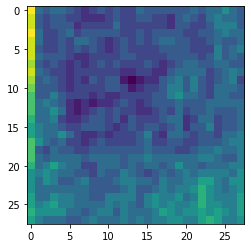

In [14]:
test = [[73,64,63,64,64,63,62,61,62,63,62,63,62,62,64,63,63,63,63,63,63,64,63,64,64,66,64,63],[72,63,62,63,63,62,62,61,61,61,62,63,62,62,63,63,62,62,61,63,64,63,62,64,65,64,64,63],[72,63,62,63,63,63,61,62,62,62,62,64,62,62,62,62,62,62,61,63,63,62,62,63,65,65,65,63],[73,64,62,62,63,64,62,63,63,63,63,63,62,62,63,62,63,63,63,63,62,62,63,63,64,65,64,64],[72,64,62,62,63,62,64,64,63,62,61,62,63,62,63,62,63,64,64,63,63,62,62,63,64,63,63,64],[72,63,62,62,63,62,63,62,63,62,61,62,63,62,62,62,62,63,63,63,63,62,62,62,65,63,64,65],[72,64,63,63,63,62,61,61,62,62,62,62,63,63,62,62,62,62,63,63,63,63,62,63,65,63,64,63],[71,63,62,63,62,61,62,61,62,63,62,63,62,62,62,63,62,61,62,63,64,64,63,63,64,64,63,63],[72,64,63,62,62,61,62,62,62,62,62,62,61,61,62,62,61,61,63,64,64,64,64,62,63,64,65,64],[71,63,64,63,62,61,62,61,63,62,63,63,60,59,60,61,61,63,64,65,63,65,63,62,63,64,65,62],[70,63,63,63,62,61,62,62,62,62,63,63,62,60,61,62,62,63,65,65,63,65,63,62,64,64,64,63],[69,63,63,65,63,62,62,62,61,62,61,61,62,62,62,62,63,63,65,66,64,64,63,62,64,64,63,63],[69,64,65,64,63,61,60,61,60,61,61,62,63,62,61,62,63,63,63,64,63,63,63,64,64,64,64,64],[69,64,64,66,64,61,60,61,62,63,62,63,62,62,61,61,62,63,62,64,62,63,63,64,63,63,63,64],[68,64,64,65,62,61,61,62,63,63,62,63,61,63,62,62,62,63,64,64,61,62,64,64,62,63,63,64],[67,65,64,64,63,62,62,63,63,63,62,61,62,63,62,63,63,62,63,64,61,63,63,65,62,63,63,64],[67,65,64,64,66,64,62,61,61,62,61,62,62,62,63,65,62,61,64,64,63,62,63,63,62,64,64,65],[69,66,64,63,64,62,62,61,62,63,62,62,62,62,63,64,62,62,63,63,62,62,63,63,63,64,65,65],[69,63,62,64,63,63,62,62,63,63,63,63,63,63,63,64,63,63,63,62,62,63,64,64,65,64,64,65],[69,64,63,64,64,64,64,63,64,64,64,64,63,64,64,65,64,64,64,64,64,64,65,65,64,63,63,65],[68,64,65,67,65,64,64,62,62,64,64,64,63,64,63,64,64,63,64,66,64,64,63,64,64,64,65,65],[66,65,66,65,64,64,63,63,62,64,63,63,65,64,63,62,63,64,63,64,65,64,65,65,65,65,64,66],[66,64,66,65,63,63,64,65,63,63,63,64,65,65,64,64,63,65,64,64,65,65,67,67,65,64,66,66],[66,64,64,64,64,64,64,64,63,63,63,63,64,65,63,63,64,65,64,65,65,66,68,66,65,64,65,66],[67,64,64,66,65,65,64,64,63,63,65,65,65,65,63,65,66,65,65,66,64,65,68,66,65,65,65,67],[67,65,66,67,65,65,64,64,64,64,65,64,65,64,63,65,66,65,66,65,65,66,68,66,66,65,65,67],[68,66,66,66,66,64,64,63,64,65,65,63,65,64,64,64,65,67,66,65,66,66,67,66,67,66,65,67],[67,65,64,64,64,63,63,64,65,64,64,64,65,64,65,64,65,65,66,66,65,65,67,68,67,65,65,66]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[1.6044734e-04 4.3353761e-04 2.9402415e-03 1.9753331e-03 1.5589279e-01
  3.3522415e-04 5.0862208e-03 3.3733035e-03 8.2980293e-01]]
0.82980293
9


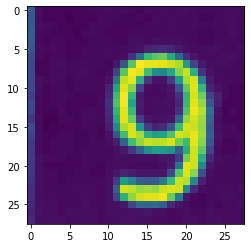

In [15]:
test = [[104,65,62,62,62,61,62,62,63,64,65,63,64,63,62,64,63,64,63,64,65,64,63,63,63,64,64,64],[104,64,62,62,62,60,62,62,62,64,63,63,61,62,63,62,64,64,64,64,63,63,62,62,63,64,64,63],[104,65,64,63,62,61,61,62,64,64,63,61,61,61,61,63,64,63,64,63,63,64,63,63,64,64,65,63],[106,63,63,62,61,62,60,63,64,63,62,61,61,63,63,63,63,64,64,64,64,63,61,62,63,63,65,64],[105,63,62,63,63,62,61,62,63,63,63,62,62,65,65,64,66,66,66,65,64,63,62,62,63,63,63,63],[103,64,63,64,64,62,61,63,63,63,64,63,64,66,67,75,78,79,76,70,66,64,64,65,65,64,63,65],[97,63,62,63,63,62,62,63,63,64,64,63,66,81,118,169,181,186,160,115,80,69,64,64,64,65,66,64],[94,61,61,64,65,63,63,64,64,63,61,69,103,179,223,217,217,216,211,203,150,93,70,65,65,65,64,63],[96,62,61,64,64,63,63,65,63,62,64,91,180,221,216,173,140,134,158,193,209,163,83,67,64,64,64,63],[94,65,63,64,64,62,63,63,63,63,67,123,207,217,163,85,68,68,88,149,202,214,129,71,64,64,63,63],[94,65,62,63,63,62,63,63,63,63,74,155,215,194,92,65,63,65,68,102,182,216,168,76,67,64,62,62],[89,64,62,63,63,63,62,62,62,63,78,170,222,168,71,64,64,64,67,81,167,213,187,92,74,63,61,62],[95,63,61,63,63,62,61,62,62,64,81,176,220,156,72,64,65,65,66,76,168,216,197,105,73,62,62,62],[93,63,61,61,64,61,62,63,64,64,79,166,216,169,71,64,65,65,66,82,177,219,206,120,67,62,63,62],[85,64,59,60,63,63,62,63,64,63,76,158,216,185,88,68,66,67,69,111,197,212,199,113,65,62,62,62],[95,64,60,61,62,62,62,63,63,62,72,137,202,213,148,89,75,79,101,172,213,210,197,107,66,64,63,62],[92,64,62,62,63,63,62,62,63,62,67,103,172,214,202,163,152,156,177,213,208,217,199,109,67,63,63,63],[87,64,61,63,63,64,62,62,63,63,65,72,109,173,196,209,206,207,214,188,171,217,194,104,66,62,62,63],[87,64,62,63,64,63,62,63,63,64,63,65,70,85,111,141,152,149,144,105,161,211,183,92,64,62,62,64],[87,66,64,64,63,62,62,64,63,63,63,65,65,65,66,66,65,68,69,88,188,212,162,77,65,64,63,64],[85,65,62,62,62,62,62,63,63,62,64,65,65,64,64,63,64,65,71,123,216,212,136,69,64,63,63,64],[84,66,63,63,62,62,63,63,62,62,65,68,75,72,68,68,68,68,95,179,216,194,100,66,63,63,63,63],[83,66,63,63,62,63,64,63,63,63,66,86,149,132,108,105,105,124,170,209,205,137,74,64,63,64,63,63],[79,65,63,64,63,64,64,64,64,63,66,108,212,207,198,200,197,209,214,212,137,77,65,63,64,64,64,66],[79,65,64,64,63,63,64,65,64,63,66,93,163,196,211,216,215,219,185,126,70,63,62,63,64,65,65,64],[78,66,65,65,63,63,64,66,64,63,65,66,70,93,115,114,115,108,78,68,64,62,62,64,62,64,64,65],[75,67,65,65,63,65,65,65,65,63,65,66,66,67,67,68,66,65,63,64,65,63,63,65,64,64,64,64],[77,65,65,66,66,64,64,65,65,63,64,65,67,67,66,66,64,64,63,64,66,65,64,65,65,64,64,64]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[1.7767776e-04 4.7587778e-04 4.2187525e-03 1.3291930e-05 1.9627677e-01
  2.7172500e-06 4.6839970e-01 5.1628012e-06 3.3043006e-01]]
0.4683997
7


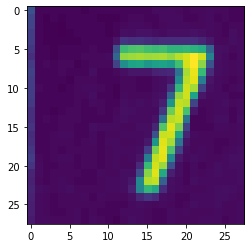

In [16]:
test = [[94,56,55,55,55,55,55,54,56,56,56,55,55,56,55,55,58,58,58,57,56,57,57,58,57,57,56,56],[88,55,53,55,54,55,56,55,55,54,54,54,56,57,57,56,56,58,58,58,56,56,57,58,56,57,56,56],[88,55,54,54,53,55,56,55,55,55,54,55,57,58,58,57,56,57,58,58,58,57,57,58,57,56,57,57],[83,55,54,54,53,54,55,56,55,55,54,56,60,59,61,61,59,58,60,60,60,61,60,58,57,56,59,57],[84,55,54,54,54,54,54,55,56,55,55,62,78,76,77,75,72,74,74,74,74,74,70,64,57,57,59,58],[80,55,55,54,55,55,55,56,57,56,56,94,167,172,174,169,166,168,161,161,163,159,155,107,60,59,57,58],[76,55,56,54,56,56,56,57,57,57,58,108,192,195,197,195,196,198,192,202,209,219,207,127,60,58,56,58],[82,55,57,55,57,57,54,56,57,57,57,87,135,149,151,141,147,149,144,169,208,219,190,96,59,58,57,58],[86,55,56,55,57,56,56,56,59,56,56,57,60,63,63,63,68,70,72,116,197,214,165,74,59,58,57,58],[83,56,56,55,55,54,57,57,57,56,56,55,57,57,55,56,58,59,63,134,202,212,124,62,58,57,56,57],[83,57,56,55,54,55,57,58,58,57,56,54,57,57,55,56,58,59,77,163,207,196,85,60,58,56,57,58],[84,56,56,55,55,56,57,57,59,56,56,54,58,57,57,57,59,61,106,193,207,149,63,58,58,58,56,56],[81,56,56,56,56,56,57,56,58,57,56,56,59,58,59,58,60,67,139,204,201,87,57,57,58,59,57,58],[76,56,56,54,56,57,57,55,56,57,56,57,60,59,58,58,58,79,181,208,171,63,56,57,58,58,56,58],[76,56,57,55,57,57,57,55,56,56,56,58,59,58,58,58,61,114,201,205,117,56,56,57,59,59,56,59],[78,56,56,56,57,57,56,55,59,58,58,58,57,57,59,59,70,174,212,187,86,55,56,56,58,58,57,58],[75,55,56,57,58,58,55,56,58,56,57,57,58,58,58,59,95,205,207,151,70,58,57,57,57,57,57,58],[76,55,55,57,57,57,56,57,58,56,58,58,57,57,58,64,139,211,197,118,62,57,57,57,55,56,57,58],[80,56,56,57,56,57,57,57,57,56,57,58,58,58,59,83,185,213,173,85,59,57,58,57,55,57,58,59],[83,57,56,57,58,58,56,57,57,56,57,58,57,58,62,124,203,212,134,65,58,59,58,57,57,58,60,60],[78,58,56,56,57,57,56,57,57,56,57,58,57,57,73,165,208,194,95,59,56,58,55,57,59,58,59,59],[70,58,56,57,57,57,57,56,56,58,57,57,59,59,92,189,211,153,67,59,56,58,57,58,59,58,58,59],[68,57,56,57,58,57,56,55,56,57,58,58,59,64,132,200,204,105,60,58,56,59,58,58,58,58,58,59],[70,59,58,57,58,59,57,57,57,57,58,58,59,68,130,163,153,74,59,58,57,57,57,58,59,60,59,58],[68,58,57,56,57,57,57,58,56,58,57,57,57,60,71,78,73,59,58,56,56,58,58,58,59,59,58,57],[67,58,57,56,57,57,57,57,57,57,56,56,56,58,59,58,57,58,57,56,57,59,58,58,59,57,57,58],[67,58,57,56,56,57,58,56,57,56,55,56,58,58,58,57,55,56,58,57,58,57,57,57,58,57,57,58],[65,58,58,57,57,57,58,55,58,57,56,54,57,59,58,57,56,56,58,57,57,57,58,58,58,56,57,58]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[9.9900295e-05 6.8433920e-04 1.1923421e-03 7.4696563e-06 3.6907991e-04
  5.0307242e-03 3.0258243e-04 9.8902589e-01 3.2878106e-03]]
0.9890259
8


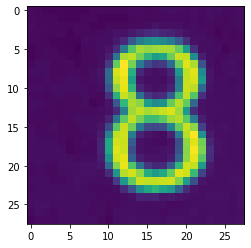

In [17]:
test = [[53,52,51,50,50,50,51,51,52,52,52,52,52,53,53,52,53,54,55,54,53,55,53,55,54,53,53,54],[53,52,52,52,50,50,51,52,52,51,51,51,51,52,53,52,53,53,53,53,53,54,53,54,53,52,53,54],[54,52,53,52,52,52,53,52,51,50,53,52,52,53,53,54,57,55,55,55,53,54,53,53,52,52,53,54],[53,53,52,52,53,51,53,53,52,53,54,56,56,60,64,68,71,66,64,60,56,54,54,53,51,53,52,53],[52,52,52,50,51,50,50,54,53,54,54,59,68,93,117,128,133,127,116,96,71,56,55,54,53,53,52,53],[51,52,53,52,51,50,48,53,53,54,57,69,117,169,190,186,189,191,190,174,138,70,55,54,54,51,53,53],[51,52,53,53,52,51,50,52,53,54,62,113,193,197,177,155,138,145,175,200,197,128,62,54,53,53,54,54],[52,54,54,52,53,53,51,52,53,55,76,174,213,179,116,85,73,76,106,175,205,193,91,55,53,55,55,53],[54,54,54,52,52,53,53,52,54,57,106,203,211,152,67,57,55,56,65,136,197,205,127,57,53,54,55,54],[53,53,54,53,53,54,54,53,54,56,105,198,208,141,58,55,55,54,59,117,198,203,137,57,54,54,53,54],[54,54,53,54,54,54,54,54,53,55,93,186,207,156,65,57,55,56,63,120,200,196,104,56,54,54,54,55],[53,53,52,53,54,53,53,54,53,52,71,153,199,187,109,74,67,69,98,165,197,169,70,55,54,54,54,55],[54,54,53,53,52,53,52,54,51,52,57,93,157,192,184,140,127,132,174,195,174,103,56,55,55,55,55,55],[54,53,52,53,52,53,53,53,53,54,56,68,120,189,198,191,195,199,204,189,137,69,56,55,55,55,54,55],[53,53,53,53,52,53,54,54,54,55,63,112,172,197,179,161,162,171,188,194,171,116,62,55,54,54,54,55],[54,52,53,54,52,52,53,54,55,57,85,171,200,177,115,86,84,87,123,173,199,184,82,56,55,56,54,55],[55,53,53,53,52,52,52,53,54,60,120,197,201,118,64,57,55,53,64,118,195,212,132,60,55,55,54,54],[55,54,54,54,53,51,52,54,53,64,146,202,200,96,56,54,53,53,56,87,185,205,178,66,56,55,54,54],[54,54,54,55,54,51,52,53,53,64,146,205,199,87,56,55,55,56,57,89,183,211,181,71,56,55,54,54],[55,55,54,54,55,54,53,54,54,61,131,202,206,99,62,57,57,56,61,100,185,207,170,69,55,55,54,54],[53,54,53,53,55,55,55,56,56,58,105,183,208,168,108,74,66,68,96,157,201,198,137,60,55,55,55,55],[53,54,53,52,54,55,55,56,56,55,68,134,195,202,185,150,138,146,174,205,201,160,82,57,55,55,55,55],[54,54,54,53,53,54,56,55,54,54,55,77,136,173,200,197,198,200,201,182,139,88,58,55,55,55,56,56],[53,54,54,54,54,54,55,54,53,53,53,55,68,90,129,146,155,143,136,101,69,57,55,55,55,55,55,56],[54,54,54,55,55,54,54,54,54,53,54,53,54,56,64,63,65,58,60,57,56,55,55,56,56,56,54,56],[54,56,56,54,54,54,54,55,53,54,52,53,54,55,55,54,54,55,53,53,54,55,55,55,55,55,54,56],[53,55,54,53,55,54,54,54,53,54,52,55,55,55,54,54,54,53,54,54,55,56,54,55,55,55,54,55],[51,53,53,53,54,54,54,54,55,53,51,54,55,56,55,55,55,54,56,56,55,55,54,56,55,55,55,56]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[2.5591016e-04 1.1039694e-04 1.4382568e-03 2.1542676e-02 4.8290547e-03
  9.5726740e-01 6.8557019e-05 1.1956357e-02 2.5314586e-03]]
0.9572674
6


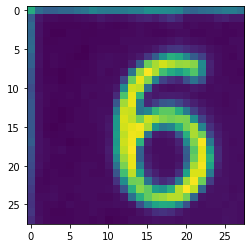

In [18]:
test = [[153,111,102,103,107,107,112,115,126,120,118,119,119,123,123,133,132,131,129,126,109,105,110,112,115,120,121,114],[101,64,59,59,58,58,59,60,61,64,62,61,62,65,68,70,66,72,77,71,61,61,61,62,66,68,64,64],[108,62,57,56,56,56,56,57,56,58,57,56,57,58,59,58,58,59,61,61,58,59,58,58,59,57,58,58],[105,62,57,55,55,57,57,56,56,57,57,57,58,58,59,58,57,57,58,59,59,57,57,58,58,57,57,58],[107,61,56,56,57,57,57,56,57,57,57,57,59,59,59,59,59,60,62,64,62,60,59,58,57,57,59,59],[109,61,57,57,57,57,56,54,57,58,58,58,58,60,60,61,65,72,78,79,74,70,67,61,59,58,58,59],[103,62,57,58,57,56,55,55,58,59,60,59,59,61,65,79,101,133,154,150,128,100,85,65,60,58,57,59],[103,61,56,58,57,56,56,57,58,60,60,59,59,67,101,177,192,202,195,188,189,184,130,69,60,58,58,58],[96,60,56,56,55,56,57,57,58,60,58,59,64,115,188,212,194,165,152,143,155,170,127,68,60,58,58,57],[95,60,57,57,55,56,57,58,58,59,59,60,88,176,207,185,125,86,76,72,93,114,94,62,59,59,58,58],[91,60,58,58,57,57,57,59,59,59,60,64,131,201,198,110,65,61,60,61,61,65,63,59,60,59,59,59],[94,62,58,57,57,58,57,59,58,59,59,73,168,207,160,69,64,66,67,66,64,61,59,59,59,58,59,59],[97,61,58,56,57,57,57,58,59,59,59,97,191,208,120,72,83,96,99,88,76,68,63,60,59,58,59,60],[98,61,57,56,55,56,58,58,59,60,60,122,201,199,117,127,160,173,173,155,119,84,70,63,60,59,59,60],[97,61,57,56,55,56,58,58,59,60,63,140,204,197,179,201,194,183,179,182,181,134,86,68,61,60,60,60],[98,61,56,55,56,58,58,58,58,60,64,140,202,207,210,193,136,118,125,155,180,193,126,76,64,60,60,60],[98,62,57,56,57,57,58,58,58,59,63,143,198,209,207,114,66,64,67,96,154,193,179,89,67,61,60,60],[101,62,59,57,57,55,56,57,58,59,64,140,201,210,157,69,60,60,61,69,128,182,211,118,69,61,59,60],[93,62,59,58,59,57,57,58,58,59,66,143,198,212,104,64,60,60,60,65,102,172,206,143,73,61,60,60],[92,61,59,57,57,57,57,58,58,58,65,131,190,208,103,67,61,60,60,62,99,176,207,155,73,61,60,59],[90,62,58,57,57,56,58,59,59,58,63,114,181,208,119,70,62,60,60,64,112,192,210,146,69,61,60,60],[87,60,57,58,57,57,58,59,58,58,60,96,165,197,146,80,68,62,62,75,145,204,204,120,65,61,60,60],[85,58,57,58,58,58,58,59,59,59,59,77,132,178,179,116,83,73,79,119,191,211,177,83,62,62,60,60],[81,58,58,59,58,58,59,59,59,59,60,64,95,154,185,174,143,136,155,196,213,198,106,63,61,61,59,60],[78,59,59,60,58,57,58,59,59,58,58,60,65,113,155,175,186,189,196,195,179,107,63,61,61,62,60,61],[77,60,58,58,57,59,58,58,59,59,59,60,60,63,92,125,146,151,150,130,94,63,60,61,61,60,61,60],[79,60,58,56,56,57,58,58,59,58,57,57,58,58,61,66,75,77,74,66,61,60,60,60,60,61,61,60],[74,61,58,57,57,57,58,58,57,58,55,56,57,59,59,60,62,61,61,60,61,60,60,60,60,62,61,60]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[8.9151750e-04 1.8493225e-03 7.7969335e-02 1.2460448e-03 3.3876202e-01
  3.9005074e-05 2.1093814e-02 4.9703306e-04 5.5765200e-01]]
0.557652
9


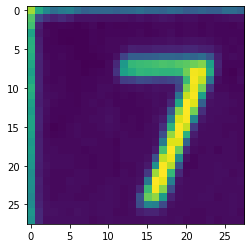

In [19]:
test = [[189,150,128,111,118,121,110,102,105,105,105,102,106,107,111,106,106,103,108,106,99,100,104,100,100,109,109,104],[168,88,74,68,72,67,61,61,61,60,60,60,60,59,61,59,60,62,61,58,59,59,57,57,58,59,60,60],[163,67,56,55,56,55,54,55,57,54,56,55,55,56,56,55,57,57,57,56,57,57,55,57,56,56,55,57],[144,64,57,55,54,54,54,54,56,55,56,56,56,56,57,55,56,57,58,56,57,57,56,57,56,56,56,56],[152,66,56,55,54,53,54,54,56,55,57,57,57,58,58,58,59,59,60,59,60,61,60,59,57,56,57,56],[153,67,56,56,56,55,54,54,55,56,57,57,61,67,66,66,68,68,69,68,70,70,67,66,61,57,56,57],[151,69,57,56,57,55,54,54,54,55,56,60,85,100,100,101,102,105,105,104,108,104,109,95,66,57,58,57],[147,68,58,56,56,55,55,53,54,54,57,71,138,158,161,162,164,166,165,169,171,176,181,143,69,56,56,56],[142,68,58,56,56,55,55,54,55,56,57,76,143,150,157,156,157,156,156,157,177,208,206,151,66,55,54,57],[147,69,57,56,57,55,55,56,56,57,57,63,82,83,89,87,84,83,86,90,161,209,197,115,59,56,55,58],[153,69,58,57,57,55,55,56,56,58,58,57,58,59,60,59,61,60,60,84,180,207,178,78,57,57,56,56],[150,67,59,58,57,56,55,57,57,58,57,56,57,56,57,58,59,58,62,114,198,209,142,64,59,59,57,57],[144,66,60,57,56,56,55,57,58,57,58,56,56,56,57,57,59,58,70,147,211,204,102,60,59,59,58,57],[141,68,59,56,56,56,56,57,57,58,59,58,56,56,56,57,58,60,94,184,211,178,74,59,59,58,57,57],[145,69,58,56,55,56,57,57,58,58,60,58,56,57,56,57,60,65,121,202,210,126,63,59,58,58,58,57],[145,68,57,54,55,57,58,57,57,58,59,58,57,57,56,58,59,74,155,210,197,80,59,58,58,57,57,57],[143,66,57,55,56,57,58,57,57,57,58,57,58,57,57,58,59,91,186,210,154,65,58,58,58,57,58,57],[138,67,58,57,57,57,57,58,58,57,57,55,58,58,58,58,60,119,203,203,104,60,58,58,58,58,58,57],[141,67,58,58,57,57,57,56,57,57,57,56,58,58,58,58,65,165,211,175,72,58,57,58,56,58,58,57],[138,67,59,58,58,58,57,57,56,57,57,56,58,58,58,60,92,196,207,131,60,56,58,58,58,58,58,57],[136,66,60,58,58,58,57,57,56,57,57,55,57,57,59,64,133,210,194,94,56,56,58,58,59,58,58,58],[131,65,59,57,57,57,58,58,57,57,57,56,58,57,59,79,188,211,158,71,57,58,58,58,59,59,57,58],[132,67,58,57,57,59,58,58,57,57,58,58,58,58,60,118,211,205,121,61,58,58,58,58,59,58,58,59],[131,66,59,57,57,58,58,57,57,58,59,58,57,58,70,161,209,182,90,59,58,58,58,59,58,58,58,58],[127,67,59,57,58,58,57,57,58,58,59,58,57,58,92,175,185,140,68,59,58,58,59,59,57,58,59,58],[130,69,60,59,59,59,59,59,58,59,59,58,57,59,90,124,121,89,60,58,58,58,58,58,58,58,59,58],[136,71,60,60,59,58,60,59,58,59,59,57,57,58,65,69,69,63,58,58,58,57,57,58,58,58,59,57],[132,71,59,59,59,59,59,59,57,58,59,58,58,58,58,59,59,59,58,59,57,57,57,59,57,58,58,58]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.0166015  0.06400263 0.03897592 0.03093873 0.10077082 0.47824416
  0.05395029 0.12699538 0.08952057]]
0.47824416
6


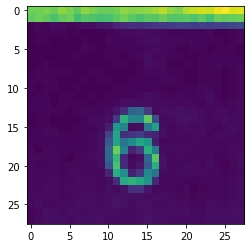

In [20]:
# 0, 0
test = [[153,153,156,152,161,156,149,161,156,152,152,154,160,158,159,160,164,169,161,157,168,171,174,173,180,184,176,178],[150,153,150,144,150,153,141,147,145,142,144,148,154,148,144,148,147,152,146,147,148,145,150,142,152,150,152,153],[45,47,46,48,47,46,47,49,49,52,53,58,61,63,62,64,66,68,69,72,71,70,72,70,71,73,74,76],[45,46,46,46,46,45,46,45,45,45,46,46,47,47,48,48,48,47,46,46,46,46,46,47,45,45,46,47],[45,46,46,45,45,45,45,46,45,45,47,46,46,46,47,48,49,47,47,47,46,47,46,46,46,45,46,47],[44,45,45,44,45,45,45,47,46,45,46,46,46,46,46,47,48,47,47,45,45,46,46,45,46,46,46,45],[44,45,44,44,45,45,46,45,45,45,46,46,45,46,47,49,47,47,46,46,45,45,46,46,46,46,46,46],[45,45,46,45,45,45,45,45,45,45,45,46,46,45,46,49,48,47,45,45,46,45,46,46,47,46,46,47],[45,46,46,46,46,46,45,45,46,46,45,45,44,45,46,47,47,47,46,46,45,45,46,46,46,45,46,47],[46,46,47,46,45,45,45,46,45,46,46,45,45,46,46,46,46,47,47,46,45,45,46,46,46,45,46,47],[46,45,46,46,45,45,46,45,45,45,45,46,46,46,46,46,47,46,45,46,46,46,47,47,46,45,46,47],[45,46,46,45,46,46,45,45,46,45,46,46,46,46,47,49,48,47,46,47,46,46,47,49,46,45,46,47],[46,46,47,45,46,46,46,46,45,46,46,47,49,49,49,49,48,48,47,47,47,47,46,48,47,46,47,48],[46,46,46,46,46,45,46,47,47,46,48,52,62,89,92,67,48,49,49,50,49,49,48,47,48,48,47,48],[45,46,46,44,45,45,45,46,48,48,50,67,134,110,109,149,77,48,48,50,51,50,48,47,48,49,48,48],[45,46,47,46,45,45,46,46,46,48,55,119,108,48,49,102,125,49,47,48,49,48,48,47,46,48,49,48],[46,46,47,47,46,46,46,46,47,49,72,127,62,65,70,60,58,49,47,48,47,47,48,46,48,48,48,47],[46,46,46,46,46,46,46,46,47,50,83,126,98,111,128,120,55,47,47,47,47,48,47,47,46,47,47,48],[47,45,47,47,46,46,47,46,47,50,92,153,106,57,68,133,103,48,48,48,48,47,47,47,47,47,48,48],[47,47,47,47,46,45,47,47,48,49,90,138,60,47,50,91,147,50,47,48,47,47,47,48,46,46,47,49],[47,46,46,47,46,47,47,47,47,49,82,144,61,48,53,84,132,51,47,47,49,48,47,49,46,45,47,49],[47,47,47,47,46,47,48,47,47,47,58,131,113,56,66,111,98,48,47,48,48,48,48,47,47,46,47,48],[47,47,47,48,47,47,48,48,48,47,48,62,130,135,129,116,60,47,47,47,46,46,47,47,47,47,48,49],[47,47,48,48,47,48,48,48,48,47,49,48,51,64,64,52,47,47,47,46,48,45,46,47,47,47,48,49],[48,48,48,48,47,47,48,49,49,48,49,51,50,49,50,49,49,49,48,47,47,46,47,47,47,47,48,49],[47,49,47,47,48,48,49,49,49,48,50,51,50,48,50,50,48,48,49,48,48,47,47,49,48,48,49,48],[46,47,50,49,48,49,49,48,49,49,49,49,48,48,49,50,49,49,49,49,50,48,48,50,49,49,50,50],[46,48,49,49,49,48,49,49,49,50,48,48,48,48,49,51,49,50,48,48,48,48,48,49,49,49,49,49]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.01246871 0.0169253  0.02775204 0.140646   0.02347741 0.456966
  0.0044917  0.20249487 0.11477794]]
0.456966
6


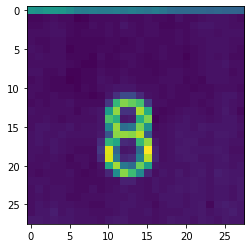

In [21]:
# 0, 3
test = [[104,102,105,105,104,100,94,93,94,93,93,94,92,94,92,90,93,90,86,85,85,84,84,83,84,83,83,82],[52,52,53,54,53,53,50,51,53,53,53,53,54,53,53,54,53,53,52,55,53,53,54,55,55,55,54,53],[53,53,54,55,54,53,52,52,54,53,54,53,56,54,53,54,54,52,52,53,53,55,56,56,55,55,54,54],[54,54,54,55,55,53,52,53,53,53,54,53,54,54,53,54,54,53,53,54,53,54,55,55,54,55,55,55],[54,53,53,54,54,52,52,52,52,52,53,53,52,53,54,53,53,53,53,54,53,54,54,55,55,55,54,54],[55,54,53,54,54,51,52,52,52,53,53,52,53,53,54,53,53,54,53,53,52,53,54,55,55,55,54,53],[54,55,54,54,54,52,52,52,51,54,52,53,54,54,53,52,53,54,53,53,51,53,54,55,54,55,53,53],[54,54,54,54,54,53,52,51,51,53,52,52,53,54,53,52,52,53,53,53,52,53,54,55,55,56,54,54],[55,55,53,53,54,51,51,52,52,54,53,53,54,53,53,53,52,53,54,54,53,53,54,55,55,55,53,54],[53,54,53,52,52,50,51,52,52,55,54,53,55,54,53,53,53,54,54,54,52,53,52,55,55,55,54,54],[54,54,53,52,52,52,51,53,52,54,55,56,56,56,54,54,54,53,54,53,53,52,53,53,54,54,54,53],[54,53,53,54,53,53,52,52,51,52,56,64,73,73,62,55,54,53,54,53,53,54,54,53,55,56,56,54],[53,54,53,54,54,55,53,53,53,53,66,118,133,128,122,68,54,54,53,53,53,54,53,54,55,56,55,54],[55,54,54,54,54,54,52,54,55,56,106,135,65,65,139,113,53,52,53,54,55,55,54,53,55,57,55,52],[54,54,55,54,53,54,54,54,54,56,123,115,57,58,114,132,51,53,54,55,56,55,55,54,55,56,56,54],[54,56,56,55,55,56,54,55,55,56,99,136,87,90,131,102,53,54,55,56,56,55,57,56,56,56,56,55],[55,56,55,55,56,55,55,55,55,57,77,134,136,134,142,79,54,54,55,57,56,56,56,55,57,57,56,54],[55,56,55,56,55,54,54,54,54,63,117,111,62,61,118,136,57,54,55,56,57,57,55,55,56,56,55,55],[55,55,54,56,55,54,53,53,53,67,147,83,56,57,85,152,60,54,55,57,57,56,56,56,57,56,54,54],[55,54,54,55,54,52,54,54,53,63,146,91,61,63,94,142,61,54,55,56,57,57,55,55,56,57,55,55],[54,54,55,54,54,53,53,54,52,55,112,138,91,86,129,108,56,55,55,55,55,56,56,55,56,56,55,56],[54,53,54,54,54,55,53,52,53,54,61,100,134,120,98,61,54,56,55,57,55,56,57,55,58,57,56,56],[55,55,55,54,54,54,53,53,53,53,54,54,59,59,55,54,56,55,55,56,56,57,56,55,57,57,56,57],[54,56,54,55,55,54,53,53,55,53,54,55,56,55,55,54,56,55,56,57,56,57,56,55,56,56,55,57],[54,55,54,55,55,53,53,54,54,54,55,55,55,56,55,54,54,56,56,56,55,56,56,55,56,56,55,57],[54,56,55,56,55,55,54,54,53,53,55,55,56,56,55,55,53,55,56,56,55,56,57,52,57,58,57,56],[54,56,56,58,55,56,55,55,54,54,54,55,56,55,55,56,54,55,55,55,56,56,57,55,56,57,58,56],[57,57,56,57,56,56,55,55,55,54,56,57,57,55,55,55,54,55,57,56,56,55,57,56,55,57,56,56]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[1.5347628e-03 2.1902472e-03 7.8254510e-03 7.7172175e-02 1.5942579e-02
  5.6391329e-01 5.4818927e-04 9.6629903e-02 2.3424333e-01]]
0.5639133
6


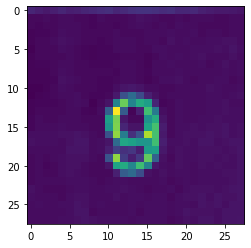

In [22]:
# 0, 5
test = [[73,70,68,70,73,70,71,73,75,77,78,74,76,79,80,80,79,77,78,74,74,75,71,69,68,68,67,66],[61,61,62,61,62,62,61,61,60,62,61,61,61,62,64,63,62,61,61,62,61,62,62,62,61,61,62,62],[61,60,61,61,62,62,62,61,60,61,61,60,61,62,63,62,61,62,61,63,62,62,61,61,61,61,62,62],[59,60,60,61,63,62,62,61,61,61,61,62,61,61,61,62,62,62,63,62,62,63,61,62,62,61,62,62],[59,61,61,62,64,63,62,61,61,60,61,62,62,62,61,62,62,61,64,62,63,62,62,63,63,64,64,62],[58,61,61,61,63,62,61,60,59,60,60,62,62,62,61,61,63,63,62,62,62,63,63,63,64,63,65,63],[59,61,61,61,61,62,61,60,59,60,60,60,61,61,61,59,61,63,62,63,62,63,64,62,62,62,64,62],[59,60,60,61,62,62,61,61,60,60,60,61,62,62,61,59,62,62,63,62,62,62,63,61,62,64,62,63],[59,59,59,61,63,62,61,61,61,61,61,60,62,62,61,60,62,62,62,63,62,62,62,62,62,63,62,63],[59,59,59,60,64,63,62,61,61,60,60,61,62,62,61,59,61,63,63,64,62,61,62,62,63,63,61,62],[58,58,59,61,63,62,61,61,61,60,60,63,66,67,65,62,62,61,61,62,62,62,62,64,63,62,62,63],[57,59,60,61,62,62,63,61,60,60,61,68,96,112,93,71,64,61,62,62,62,62,62,63,63,62,63,64],[59,60,60,60,61,62,63,62,58,61,65,128,178,128,153,145,73,60,61,63,62,62,62,63,63,64,62,62],[59,61,61,61,61,62,62,60,59,62,106,214,102,59,71,166,122,63,61,63,62,62,62,63,63,64,63,63],[60,62,61,61,62,62,62,61,61,61,145,182,67,61,61,137,154,66,61,63,62,62,63,63,64,63,63,63],[60,62,62,62,63,62,62,62,61,61,139,183,73,65,65,148,168,69,61,63,63,64,63,64,64,65,63,64],[63,63,63,63,64,64,65,64,62,61,96,188,123,79,97,195,168,68,61,63,64,64,64,65,64,65,63,64],[64,63,63,63,62,64,66,66,62,63,66,111,150,146,139,139,166,70,63,63,64,63,65,65,63,64,65,65],[62,62,62,62,62,65,65,65,62,63,70,87,79,82,70,144,146,67,62,64,63,63,64,64,64,63,64,66],[61,62,61,62,63,64,64,64,62,61,97,188,84,70,83,176,106,64,61,64,63,63,64,64,63,64,63,65],[61,62,60,61,63,64,64,62,61,61,66,149,153,129,165,128,67,63,62,64,63,62,64,63,64,63,63,65],[61,62,61,61,63,64,63,62,61,61,61,71,103,111,94,64,62,64,62,63,63,62,63,63,63,64,64,65],[61,62,62,62,62,63,63,63,62,61,62,63,63,62,62,62,62,63,61,62,63,62,63,63,63,63,64,65],[64,62,61,61,61,62,63,63,62,62,63,63,64,63,62,61,62,62,63,61,63,64,64,64,63,64,65,66],[63,62,62,62,61,63,64,64,62,62,62,64,62,63,63,62,63,63,61,63,64,64,65,63,65,64,64,66],[62,63,62,62,63,63,65,64,62,63,62,62,62,63,62,63,63,63,62,63,63,62,65,64,65,63,65,65],[62,62,62,62,62,63,65,65,61,62,62,62,62,63,61,63,63,63,62,63,65,64,64,64,63,65,65,65],[62,62,62,62,63,63,64,65,64,63,63,63,63,62,63,63,63,63,61,62,64,63,65,65,63,65,65,66]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.05033285 0.00712925 0.10732207 0.3883268  0.02203372 0.05280809
  0.00949273 0.06163118 0.30092335]]
0.3883268
4


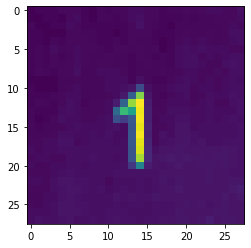

In [23]:
# 1, 5
test = [[62,64,64,64,66,66,66,64,63,65,64,65,65,67,67,66,66,64,65,65,66,65,66,67,67,66,66,68],[63,62,64,64,63,66,67,64,63,65,65,64,65,67,68,66,66,64,64,64,65,64,65,65,66,66,66,67],[65,63,63,64,64,67,66,64,64,64,64,64,64,66,69,66,65,64,63,65,65,65,65,65,65,66,67,66],[64,64,63,63,63,66,66,65,65,64,64,63,64,66,66,66,64,64,64,65,66,65,65,66,65,66,68,68],[64,64,63,65,64,66,66,66,65,64,64,65,64,66,65,65,64,63,64,66,67,66,67,66,65,66,67,68],[64,65,64,67,65,66,67,66,66,65,64,66,66,65,66,65,66,63,64,67,68,67,68,67,67,67,66,66],[64,65,64,66,64,65,67,66,65,65,66,65,65,64,66,65,64,65,64,67,68,68,66,67,66,67,68,68],[64,65,64,66,65,66,67,66,65,66,66,65,65,64,65,66,65,65,64,67,68,68,67,65,65,68,69,68],[64,66,65,64,66,66,68,65,65,67,67,67,66,64,65,65,65,66,65,66,67,67,66,66,67,66,68,68],[63,63,63,63,65,65,66,65,65,65,67,67,67,64,68,65,64,64,66,67,68,67,66,67,66,67,68,67],[64,63,63,63,65,66,67,65,65,65,67,67,68,70,96,68,65,65,67,68,68,66,67,67,66,67,68,68],[64,64,64,65,66,67,67,65,65,65,66,67,72,106,182,71,65,64,66,67,68,65,66,68,67,67,69,68],[64,66,65,64,66,68,67,64,66,66,67,73,109,186,209,74,65,66,67,67,67,66,67,68,66,66,68,69],[65,64,64,64,67,68,67,66,66,66,67,113,161,146,206,75,66,66,68,68,68,67,67,68,67,67,67,69],[65,63,64,66,68,67,67,66,66,67,68,98,89,102,207,75,65,67,67,69,69,67,67,68,67,68,69,68],[65,64,65,65,66,67,68,67,67,67,68,69,67,100,204,76,66,66,67,70,70,67,68,68,68,68,68,69],[65,65,65,66,68,68,67,67,68,67,69,67,67,102,207,75,66,69,67,70,70,69,68,68,68,68,68,69],[66,66,67,67,69,69,66,67,68,68,68,67,68,102,203,77,66,68,69,70,71,69,70,68,68,69,69,69],[67,66,67,67,68,68,68,68,68,68,68,68,68,100,200,79,68,70,70,71,70,70,70,70,70,71,70,69],[66,67,67,66,66,68,68,68,69,68,68,67,68,100,189,79,70,71,72,71,72,71,71,70,71,71,70,69],[67,65,66,67,67,68,68,67,68,68,68,68,69,86,128,74,70,69,70,72,70,70,71,71,70,71,70,69],[66,66,66,67,68,69,68,68,68,68,68,69,69,69,69,69,69,70,70,70,70,70,70,71,70,70,69,69],[67,67,66,68,70,70,69,69,68,68,66,68,68,68,69,68,69,71,69,71,70,70,70,71,70,70,71,71],[66,66,66,68,69,70,70,69,68,69,67,68,69,68,69,68,69,70,70,72,70,70,70,70,70,70,72,73],[65,65,67,67,69,70,69,68,68,68,68,70,69,70,69,69,71,70,70,70,70,70,70,70,70,72,70,72],[66,65,67,68,70,70,69,69,68,68,68,69,68,69,69,68,69,69,69,70,71,70,71,69,70,71,70,70],[67,67,67,68,70,70,70,69,68,68,69,69,69,68,68,68,69,69,69,71,70,70,70,70,71,71,70,70],[67,69,68,68,69,70,68,68,69,68,69,70,69,69,68,69,69,70,70,71,71,70,71,73,70,71,71,70]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.03725344 0.01636782 0.19902065 0.15935025 0.07343763 0.04673834
  0.00562612 0.21083404 0.25137168]]
0.25137168
9


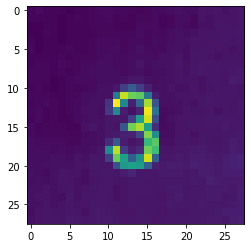

In [24]:
# 1, 6
test = [[69,71,69,69,69,68,69,69,70,71,71,70,70,70,69,70,71,71,72,73,72,72,74,74,75,73,74,75],[69,69,69,69,68,69,70,69,70,70,71,69,70,69,70,70,71,69,70,72,72,70,74,73,74,74,74,75],[67,68,69,69,68,69,69,69,70,70,70,69,69,69,71,71,71,69,70,72,71,70,73,73,75,75,74,75],[68,68,70,69,68,69,69,69,69,70,70,70,70,70,72,70,71,70,72,73,72,73,74,74,74,75,75,76],[69,68,69,69,68,69,69,69,70,71,71,71,70,71,71,70,72,71,72,73,73,74,74,74,74,75,74,75],[70,68,69,69,69,70,69,69,70,71,71,72,70,71,73,71,71,71,73,73,72,74,74,75,74,74,73,74],[69,69,69,69,70,69,70,70,70,71,72,71,71,72,72,72,71,73,73,74,72,75,75,74,73,74,74,74],[69,70,70,69,71,70,70,71,71,72,72,71,71,72,74,72,73,73,73,75,73,74,76,76,75,75,75,75],[70,70,70,69,70,69,70,71,72,72,72,72,71,72,73,71,72,72,73,74,73,75,76,75,75,74,76,77],[70,70,70,68,69,70,71,71,71,72,72,72,73,75,76,73,72,73,73,74,74,74,73,75,75,74,78,77],[69,70,69,68,69,70,69,70,71,73,73,76,92,106,92,79,73,73,74,73,73,75,73,74,75,74,75,74],[70,70,70,69,69,70,70,72,72,73,73,123,191,173,169,123,78,73,73,74,74,75,74,76,75,75,75,74],[69,70,71,70,69,70,71,72,73,73,88,203,130,79,114,185,102,73,73,73,74,73,75,76,75,75,74,76],[70,71,69,70,69,70,71,73,73,72,90,130,78,73,81,200,119,71,72,73,75,74,74,75,73,75,74,76],[69,71,69,70,69,69,71,72,73,73,75,76,76,92,145,194,99,71,73,74,74,75,75,76,76,76,76,75],[71,69,70,70,70,69,69,73,75,73,76,74,103,174,186,144,85,71,72,74,74,75,75,76,75,77,75,76],[71,70,70,70,70,70,70,71,72,73,76,77,79,80,96,177,135,72,72,74,75,73,75,75,75,75,76,77],[72,71,71,71,71,70,70,72,72,73,85,105,78,74,77,158,168,73,73,75,75,74,76,75,74,76,78,77],[72,72,72,71,72,71,72,72,73,74,133,189,91,78,83,173,161,75,74,76,76,77,77,76,75,76,78,77],[72,72,72,73,73,72,74,73,76,75,92,172,145,108,134,194,110,76,76,77,76,78,78,77,76,78,79,80],[72,72,73,73,73,73,74,74,76,75,75,100,140,145,143,109,79,77,78,78,77,79,78,78,77,78,79,80],[73,72,71,73,75,74,74,72,75,76,76,75,78,81,76,76,76,77,77,77,76,76,78,78,77,78,78,78],[72,73,72,73,75,74,73,72,74,75,76,74,74,76,76,75,75,76,76,76,76,77,76,79,78,77,77,77],[73,73,74,73,74,75,73,74,75,76,76,73,74,76,76,76,75,75,77,77,75,76,76,77,77,77,76,78],[73,74,74,73,72,76,73,75,75,76,75,73,74,76,75,75,75,74,76,78,75,76,76,77,77,75,76,78],[73,73,75,73,74,75,74,75,76,76,75,75,74,76,75,75,75,75,77,76,76,76,77,76,76,76,77,78],[72,74,75,74,74,76,75,73,76,77,76,75,74,74,76,75,75,74,76,75,75,76,76,76,77,78,78,78],[73,74,75,75,74,77,76,75,76,77,77,76,75,75,76,76,74,75,76,76,76,76,76,77,77,76,78,79]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.02345998 0.00924491 0.1368645  0.19841672 0.05526779 0.09168407
  0.00581894 0.13236006 0.346883  ]]
0.346883
9


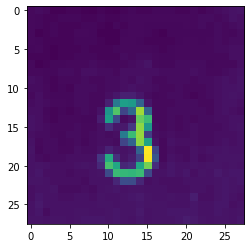

In [25]:
# 2, 4
test = [[68,69,68,65,65,66,66,65,64,66,65,64,66,67,66,66,67,67,67,66,66,68,66,68,69,70,71,72],[68,67,66,66,67,67,67,66,66,67,66,66,67,68,68,68,68,68,68,68,68,68,69,69,68,69,71,70],[68,67,66,67,66,66,66,67,67,66,65,67,66,68,68,67,67,67,67,67,68,68,69,67,69,68,69,70],[68,65,66,67,66,66,68,68,67,65,65,65,67,68,68,67,66,65,67,67,67,67,67,67,69,68,67,69],[68,67,66,66,66,66,67,67,67,66,65,65,68,68,67,66,66,66,66,67,68,68,67,68,69,68,69,69],[67,68,66,65,66,66,66,67,66,66,66,67,68,68,68,68,67,66,67,68,68,68,68,68,69,69,70,70],[66,66,66,65,66,66,67,67,67,66,66,66,69,68,69,69,68,67,67,68,68,68,68,68,68,68,70,70],[68,65,66,67,67,68,68,68,69,68,67,67,68,69,70,72,68,67,67,69,69,69,69,67,68,68,68,70],[68,68,67,67,69,69,68,70,70,69,69,68,70,70,70,70,70,69,69,69,69,70,69,68,68,69,70,71],[70,69,67,66,68,68,68,69,68,68,69,69,70,69,71,70,68,68,69,69,69,68,69,69,70,71,70,72],[69,69,68,66,67,66,69,69,69,68,69,69,70,71,70,70,69,68,68,69,68,68,68,69,70,71,71,72],[68,70,68,67,67,67,69,69,68,68,70,73,77,77,73,69,67,68,69,69,68,66,68,69,70,71,72,71],[69,70,69,68,68,67,69,69,68,68,77,124,147,144,111,73,68,68,68,69,69,69,68,68,70,71,71,70],[70,70,67,66,67,66,68,69,68,71,140,171,95,114,190,112,68,68,69,69,69,69,69,68,70,71,70,69],[71,70,68,66,68,68,68,67,67,76,147,97,69,72,177,164,68,68,69,68,69,68,69,69,70,70,71,71],[71,70,69,68,68,68,69,68,68,70,82,73,74,87,186,143,69,68,69,68,69,70,69,69,69,70,71,72],[70,69,69,68,67,69,69,68,69,70,69,70,124,164,188,91,70,69,70,69,69,70,69,69,70,70,70,71],[71,68,69,69,67,68,69,67,69,70,70,69,94,111,186,149,72,68,71,70,70,70,69,69,70,71,70,71],[72,67,69,69,68,68,70,69,69,71,78,73,71,73,111,211,94,68,70,69,69,71,70,71,71,72,71,71],[71,69,68,69,69,70,70,70,70,87,155,84,72,75,93,210,103,68,71,70,69,71,69,70,72,72,72,72],[71,72,71,70,70,70,71,72,71,81,168,152,80,83,151,180,83,70,73,71,71,72,71,72,72,71,72,71],[71,73,70,70,70,69,70,70,71,72,97,164,162,161,164,96,71,71,73,71,73,70,72,71,74,72,73,73],[72,72,71,70,70,70,70,69,71,71,71,80,99,98,80,70,71,70,70,70,71,71,71,71,72,73,72,73],[70,71,71,72,69,69,69,70,69,71,72,73,71,72,72,71,71,71,70,70,70,71,71,70,72,73,72,71],[70,73,71,71,70,70,71,71,70,72,71,71,72,73,74,72,71,71,72,71,71,76,70,70,72,73,71,70],[71,74,71,71,71,71,71,71,71,72,72,71,72,72,73,72,72,72,71,71,71,73,71,71,73,73,70,71],[71,73,69,71,71,71,72,72,71,71,72,73,72,72,74,71,72,72,73,73,73,73,71,71,73,72,71,72],[72,72,71,72,72,71,72,73,73,73,72,73,72,71,73,71,72,72,72,73,75,74,72,71,72,72,71,73]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.01689595 0.02386639 0.02452992 0.0160672  0.0162601  0.06486593
  0.02772138 0.12740335 0.6823898 ]]
0.6823898
9


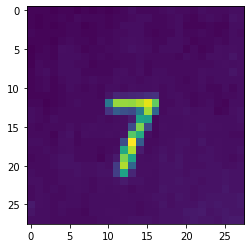

In [26]:
# 2, 5
test = [[70,70,70,69,70,70,68,70,69,70,69,70,71,73,71,71,71,72,73,72,72,71,73,72,72,72,73,73],[70,69,70,70,71,70,72,71,71,71,70,71,71,72,73,73,71,71,72,73,71,70,72,73,72,71,75,74],[70,69,70,69,70,71,71,69,70,71,70,71,73,73,73,71,71,71,72,73,70,70,70,71,70,70,73,73],[71,70,70,70,70,71,71,70,70,71,71,72,72,73,73,71,70,71,71,73,71,71,72,71,70,71,73,72],[70,70,70,69,71,72,71,71,70,72,71,72,73,74,73,72,71,71,73,73,72,70,71,71,72,71,73,73],[68,70,71,70,74,73,72,70,71,71,72,72,73,75,74,73,71,73,73,73,70,72,70,71,74,73,74,73],[69,71,71,70,73,73,73,72,71,72,71,72,72,72,73,72,72,72,72,71,73,72,71,74,74,73,76,73],[69,72,71,71,73,73,72,72,70,71,71,71,72,72,73,71,72,72,72,72,72,72,72,72,73,74,73,74],[70,72,73,71,73,73,73,71,71,71,71,73,74,72,74,71,73,73,72,72,72,72,74,73,73,73,76,74],[70,71,72,70,72,73,73,72,73,72,72,74,73,73,72,73,74,73,73,72,71,72,74,72,73,73,73,73],[70,71,72,70,71,73,72,71,72,71,73,73,72,74,73,73,74,72,73,72,72,72,73,71,71,73,71,73],[70,70,70,70,71,72,72,72,72,71,76,83,82,83,84,87,88,72,73,74,72,71,72,72,71,72,72,73],[71,71,69,70,71,72,73,72,72,72,124,187,187,186,192,203,175,72,72,74,73,71,72,73,71,70,73,73],[73,72,70,71,72,72,72,72,72,72,90,109,103,100,125,189,115,72,74,74,75,73,74,74,70,71,74,75],[73,72,71,73,72,72,72,72,72,73,72,73,74,79,150,147,71,73,73,73,74,74,74,74,73,73,73,75],[72,71,72,72,72,74,72,73,74,73,73,74,74,100,182,98,71,74,73,73,74,73,75,74,74,73,73,74],[72,72,72,70,73,75,71,74,73,73,74,73,75,172,155,74,71,73,73,74,74,73,74,73,73,73,72,72],[73,73,72,71,74,74,71,72,72,72,72,72,101,209,109,72,72,73,74,75,75,73,76,73,74,73,73,73],[72,72,73,72,73,74,72,72,72,71,72,73,153,192,79,72,73,75,74,75,74,73,74,75,74,73,73,75],[71,72,72,73,75,75,72,72,72,70,73,78,181,150,74,73,74,76,74,76,74,74,75,75,74,73,72,74],[72,72,72,73,75,75,75,74,74,75,74,93,192,114,74,74,74,75,75,76,74,74,74,75,75,73,74,75],[73,72,72,72,74,74,75,74,74,75,75,94,149,83,74,74,73,75,75,75,74,75,75,75,75,76,75,75],[74,74,72,72,74,74,74,73,72,74,74,75,78,75,75,73,73,75,75,76,75,75,74,75,75,76,75,75],[72,74,72,73,72,73,74,73,72,74,73,74,74,72,74,73,73,76,75,75,75,74,75,75,75,77,75,75],[72,74,73,72,72,73,73,72,73,73,73,73,74,73,73,74,75,75,74,76,75,74,75,76,76,76,76,77],[78,74,73,72,74,73,73,72,73,73,73,73,73,73,72,73,74,76,74,75,75,75,77,76,77,76,76,77],[76,73,73,72,73,72,72,71,73,73,74,74,73,73,72,73,73,75,75,75,77,77,78,75,76,77,76,76],[73,73,73,72,72,72,72,72,72,73,73,74,74,75,75,75,74,75,75,75,76,77,76,76,75,77,78,78]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.0044589  0.00561701 0.0168214  0.16231634 0.01279727 0.45025986
  0.00082269 0.22937113 0.11753543]]
0.45025986
6


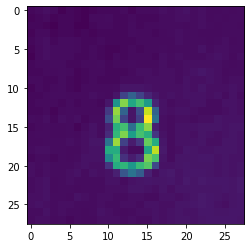

In [27]:
# 2, 6
test = [[76,77,79,77,74,76,75,74,75,76,76,76,77,75,77,77,77,79,78,79,80,78,79,77,77,78,77,78],[75,76,77,75,76,76,75,74,77,77,78,76,76,77,76,76,76,78,78,79,79,78,79,77,78,77,78,78],[76,76,75,73,76,76,74,74,76,77,77,76,76,78,76,77,77,78,78,78,77,78,79,78,77,78,78,77],[75,77,77,75,76,76,75,76,75,76,76,76,76,78,77,77,76,77,78,79,78,78,77,77,77,78,78,78],[76,78,79,76,78,78,77,76,76,77,76,76,76,76,77,77,77,77,77,79,78,78,78,77,78,79,77,78],[75,77,79,78,78,78,77,76,77,76,75,75,76,77,76,77,77,78,77,78,78,78,80,78,79,79,78,78],[74,77,79,78,78,78,76,76,77,76,75,77,76,77,77,77,76,79,78,79,78,78,78,79,80,79,77,79],[76,77,77,78,78,76,76,77,77,78,76,77,77,78,77,77,77,79,77,78,79,79,79,79,79,78,77,78],[76,76,77,77,78,77,75,76,77,77,76,76,76,77,79,79,78,79,79,78,79,80,82,80,79,77,78,78],[77,77,76,76,78,76,75,76,77,76,76,76,78,78,78,79,79,79,79,78,80,79,79,80,79,78,79,79],[75,77,76,77,78,76,75,77,77,77,77,78,81,81,81,80,79,79,79,79,80,79,81,79,79,79,80,79],[76,76,77,78,78,77,77,77,79,78,77,81,102,118,102,88,82,79,80,79,80,80,80,79,80,78,80,78],[76,77,77,77,76,78,76,77,77,76,82,148,191,160,174,152,88,80,78,79,79,80,80,78,78,80,80,79],[76,76,77,75,77,78,77,77,77,77,97,195,119,81,108,206,118,80,79,80,80,79,78,78,78,79,80,79],[78,77,79,76,79,78,79,76,78,78,107,187,102,81,100,218,127,79,78,79,79,78,79,79,81,80,80,80],[76,77,78,77,77,78,75,78,80,78,87,165,174,126,171,193,85,79,78,80,80,80,81,81,81,80,81,81],[77,78,78,77,77,78,77,79,80,78,91,169,190,154,175,165,96,80,78,80,80,79,81,80,79,80,81,80],[77,77,78,78,78,79,78,79,81,81,129,196,101,84,96,184,163,82,78,80,80,80,81,79,79,81,81,80],[78,79,79,78,78,77,77,79,80,80,162,163,84,78,78,159,204,83,78,79,82,81,80,80,81,81,81,80],[76,78,78,76,78,77,78,80,80,80,142,170,93,84,91,189,177,81,78,81,81,81,82,82,80,81,80,80],[79,78,79,78,78,78,79,80,79,79,95,163,168,150,171,180,104,80,80,81,82,81,81,81,80,81,80,81],[79,77,79,78,78,79,80,78,80,79,80,86,112,128,115,86,79,82,83,80,82,82,82,81,80,81,80,81],[78,79,80,77,78,79,78,78,78,78,80,80,78,80,81,82,81,81,82,80,83,81,83,82,82,82,81,83],[78,79,80,77,78,78,77,78,78,78,79,79,79,81,81,80,79,81,79,81,81,81,81,81,81,82,81,83],[79,79,80,78,78,77,80,79,78,79,79,78,78,79,79,78,78,80,80,79,80,81,83,82,81,80,81,82],[79,80,79,78,79,79,78,78,78,79,78,78,79,79,78,80,80,79,79,81,81,82,83,82,80,79,81,82],[78,78,80,78,79,78,78,77,78,80,79,78,77,78,79,79,80,79,80,81,80,80,82,82,81,81,82,82],[77,79,79,77,78,76,78,77,77,79,79,79,78,79,78,78,80,79,80,81,81,80,81,82,82,82,82,81]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.00483448 0.0036039  0.02922993 0.1572776  0.04747093 0.34790942
  0.00089337 0.12346996 0.28531036]]
0.34790942
6


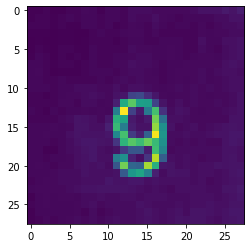

In [28]:
# 2, 7
test = [[81,81,82,80,80,82,82,84,83,81,83,83,82,85,85,85,84,84,84,84,84,85,87,87,87,90,88,92],[81,82,82,81,82,83,82,83,83,82,83,83,82,85,84,84,86,84,83,82,83,83,83,83,85,85,87,87],[82,82,82,81,82,81,81,83,83,82,83,81,82,84,83,82,85,83,82,83,83,82,84,82,84,85,85,86],[81,81,81,80,81,81,80,80,82,83,82,82,83,84,84,82,84,82,82,82,82,82,84,83,84,84,85,85],[80,81,80,80,81,81,80,81,82,82,82,81,82,83,83,82,82,83,83,83,82,82,86,83,83,86,86,87],[80,82,81,80,82,82,81,81,83,82,82,82,82,85,84,84,83,83,84,83,82,82,85,83,82,85,86,87],[81,83,82,80,82,81,82,81,83,82,82,83,83,84,85,85,83,83,84,83,82,83,84,84,83,85,86,87],[83,83,82,81,82,82,81,82,83,82,82,83,84,86,85,85,84,82,83,83,84,84,84,84,84,86,87,86],[83,84,82,80,81,81,81,82,83,83,83,82,84,85,85,84,83,82,83,84,84,84,85,83,85,86,86,85],[83,83,82,82,83,82,82,82,82,83,82,84,85,84,85,84,84,82,83,84,83,84,85,83,84,85,86,86],[83,83,83,82,83,83,85,85,85,84,84,86,84,86,86,85,84,83,84,85,84,85,84,85,84,85,86,86],[82,82,81,82,83,84,84,85,86,85,84,87,89,110,113,99,89,84,83,84,84,85,84,83,84,84,85,87],[82,82,82,82,84,84,82,85,85,83,84,93,171,191,164,163,110,88,84,86,84,85,84,84,85,84,85,87],[83,82,81,83,82,83,83,84,83,84,83,144,229,109,90,140,185,101,85,87,86,84,83,84,84,85,86,87],[82,82,82,82,84,85,88,87,86,84,89,175,167,90,86,91,197,135,86,86,85,84,84,84,84,84,87,87],[83,83,83,84,83,84,88,88,86,86,93,181,143,92,87,87,205,154,87,84,85,86,84,85,86,87,88,87],[83,83,84,83,83,86,88,87,87,87,89,151,185,106,93,126,227,158,85,85,86,85,85,86,87,87,89,89],[83,83,83,82,83,85,87,89,89,88,87,103,177,190,182,195,181,155,85,84,85,84,85,84,84,87,89,88],[83,83,81,81,83,85,86,88,89,86,85,88,105,120,120,92,183,148,84,85,85,85,85,85,85,87,87,86],[83,83,82,83,83,84,86,87,89,86,86,144,155,94,86,103,213,124,86,85,86,85,84,85,85,87,88,86],[83,84,83,82,84,84,86,87,86,87,85,120,197,129,126,209,174,89,88,85,86,85,86,86,88,87,88,88],[83,83,83,84,85,85,85,87,86,86,86,87,122,159,167,146,93,85,88,87,87,85,86,86,85,86,88,89],[82,83,84,84,85,85,85,86,86,86,89,87,87,89,89,86,87,86,86,86,86,85,86,84,85,86,87,88],[83,84,84,84,84,85,86,87,87,88,88,88,88,87,86,85,86,85,84,86,86,86,86,85,85,88,88,90],[81,83,84,83,84,84,83,85,85,86,85,85,86,86,85,86,86,86,85,85,85,86,86,86,85,86,87,89],[82,83,84,83,83,83,84,85,86,84,85,85,85,85,87,86,85,85,85,86,85,86,86,87,86,86,88,88],[81,83,83,83,83,83,84,82,85,82,84,85,85,85,86,88,86,85,86,87,85,88,88,87,86,87,89,89],[81,82,84,82,83,84,85,84,85,83,85,86,85,85,86,87,86,85,86,88,87,88,88,86,85,87,88,89]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.01696825 0.04016514 0.06234378 0.05668588 0.04751356 0.22249132
  0.00773208 0.32647684 0.21962307]]
0.32647684
8


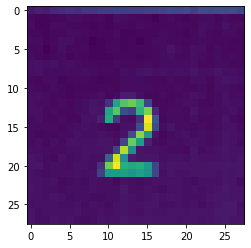

In [29]:
# 3, 4
test = [[82,85,84,89,90,93,91,94,94,97,97,99,98,99,99,102,101,103,105,104,106,100,107,106,107,107,107,104],[76,74,74,75,76,77,77,76,75,76,74,78,77,76,76,75,73,76,77,75,74,76,77,77,75,77,75,75],[77,74,74,77,77,76,75,75,74,75,74,76,76,75,77,76,75,76,76,76,75,75,78,77,76,79,77,77],[76,75,74,76,76,77,77,76,75,75,75,77,74,74,75,75,75,77,76,75,74,76,78,76,75,77,77,75],[77,77,74,76,78,78,76,75,73,74,75,76,74,75,73,75,77,77,76,76,75,76,77,76,76,76,75,75],[76,76,72,75,78,76,76,76,74,74,76,76,74,75,75,75,76,77,80,77,76,78,78,75,77,76,76,76],[77,75,74,76,77,74,76,75,74,74,74,75,75,75,74,75,76,77,78,76,76,78,77,76,77,76,77,76],[78,79,78,79,77,78,77,76,76,75,75,77,76,76,76,77,76,77,77,77,77,78,76,76,77,77,76,76],[78,79,77,77,77,77,77,78,77,76,76,75,78,77,79,80,78,79,78,79,78,80,78,78,80,78,78,77],[76,75,77,77,74,75,76,76,75,74,75,75,77,77,77,76,76,75,77,76,76,78,78,76,78,80,79,78],[77,76,75,77,76,74,75,75,75,76,76,75,77,77,77,77,76,76,76,77,76,76,77,75,78,78,77,76],[78,78,77,76,76,74,76,76,77,78,75,77,83,83,78,75,75,77,75,76,77,79,78,75,77,79,77,77],[78,77,77,76,77,76,77,78,80,79,93,158,179,185,173,102,76,76,76,77,78,78,76,75,77,79,78,78],[78,78,76,77,76,76,77,78,81,80,159,180,107,101,167,190,89,76,77,77,76,80,77,77,77,78,79,77],[77,78,76,76,77,76,76,79,79,85,163,98,78,77,93,219,113,75,77,77,76,78,76,76,77,80,77,76],[77,77,77,77,76,77,78,79,78,77,76,75,79,79,108,211,107,77,80,77,77,76,77,76,77,79,79,77],[77,75,76,76,77,77,79,78,78,79,78,77,80,107,193,154,80,75,77,78,79,77,78,77,78,80,79,78],[77,78,76,78,77,79,79,79,79,80,80,78,104,185,154,85,77,76,78,77,78,79,78,77,78,80,79,77],[78,78,77,77,77,78,78,79,79,79,80,102,202,144,80,79,79,78,77,77,76,80,77,78,79,81,79,79],[80,79,77,76,79,77,78,79,78,78,118,209,146,84,80,81,80,78,79,79,78,80,79,79,79,80,79,80],[80,81,77,78,78,77,79,79,78,93,187,218,164,161,163,152,102,79,81,80,80,80,80,80,81,81,80,80],[79,78,77,78,78,78,79,78,79,101,153,153,155,150,156,148,103,78,81,79,79,80,80,80,79,81,80,81],[79,79,78,79,76,77,78,77,79,78,78,76,79,78,77,78,79,79,79,79,78,77,79,79,79,81,80,77],[80,79,78,78,77,78,78,78,79,78,78,78,82,78,78,79,78,77,79,79,78,79,78,79,80,82,80,79],[79,79,78,80,79,77,78,78,77,77,78,78,81,79,78,79,81,79,80,79,78,78,78,80,81,81,80,80],[78,79,79,79,78,78,79,77,79,78,77,79,80,79,79,80,80,78,78,79,78,79,77,79,80,82,82,78],[80,78,79,79,79,79,80,78,78,79,78,79,80,79,78,80,79,79,80,80,79,80,80,80,82,82,82,79],[80,78,78,80,79,80,78,77,78,80,79,79,82,80,80,81,80,80,80,79,80,80,79,80,81,82,80,80]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[1.5814946e-03 2.1806846e-03 2.4196773e-03 9.5395529e-01 2.0666816e-03
  3.1408016e-02 8.0080492e-05 2.2778474e-03 4.0302775e-03]]
0.9539553
4


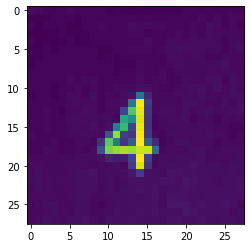

In [30]:
# 3, 6
test = [[86,85,84,83,84,85,83,84,83,83,82,83,82,81,82,81,82,82,82,82,83,83,83,83,83,84,84,84],[82,82,82,83,83,83,82,83,84,83,84,84,84,84,83,83,84,84,84,83,84,84,85,84,85,84,85,85],[83,81,83,83,83,82,81,83,83,85,84,83,84,86,85,86,85,85,83,84,84,85,84,87,86,84,85,84],[82,81,81,82,84,82,82,82,83,84,84,83,84,85,85,84,83,83,83,85,84,85,84,86,85,85,85,85],[83,81,82,81,82,83,81,82,84,83,84,83,83,83,84,86,84,83,86,85,85,86,85,86,85,84,85,86],[82,81,83,82,83,84,83,83,84,82,82,83,83,85,85,85,84,85,86,87,86,86,86,85,86,84,86,87],[82,82,84,84,84,84,83,84,83,82,84,82,83,83,84,84,84,83,86,86,85,86,85,84,84,86,85,85],[82,83,84,83,84,84,83,83,83,83,83,82,82,82,85,84,84,84,85,86,85,85,85,85,86,87,85,85],[84,84,83,83,83,83,84,83,84,84,83,82,84,83,85,83,83,85,83,85,85,85,85,86,85,86,86,85],[83,84,84,83,84,85,84,85,86,83,84,83,84,84,86,84,85,85,84,84,86,85,85,88,88,84,87,86],[83,84,83,82,84,83,85,84,85,84,84,85,85,85,88,87,85,83,84,85,86,87,88,86,88,85,87,86],[82,84,84,82,83,86,85,83,87,84,85,84,86,89,142,98,85,85,85,86,86,86,87,86,85,86,87,87],[83,84,84,84,83,85,86,86,86,84,86,86,88,145,242,109,85,85,85,85,87,87,86,85,85,87,85,88],[83,83,85,84,82,85,85,87,86,84,85,85,115,200,238,106,85,86,86,85,87,85,86,87,86,86,87,88],[83,84,85,83,84,86,86,86,86,86,86,83,179,161,235,104,84,85,86,86,87,84,85,86,84,86,85,86],[83,83,85,83,84,85,86,85,88,86,88,150,190,113,239,105,83,85,85,86,86,86,86,86,85,85,84,84],[85,84,84,84,84,85,85,86,86,85,123,220,111,106,241,107,86,84,86,86,86,86,86,87,86,85,84,85],[84,84,84,85,84,84,85,85,84,104,203,147,106,129,244,129,100,84,86,88,87,86,86,86,84,85,85,85],[84,84,86,85,84,83,85,84,86,123,211,219,223,220,232,231,138,85,86,85,86,87,88,86,85,86,86,86],[85,85,85,85,85,85,86,86,86,89,96,93,93,114,243,112,86,87,86,87,87,87,88,85,86,85,86,87],[86,86,85,85,85,86,86,86,85,86,86,87,85,109,234,104,86,87,87,88,88,89,88,87,87,86,87,87],[86,87,86,85,85,86,87,88,89,86,87,86,87,91,110,88,87,86,89,89,88,88,87,87,87,87,88,87],[87,88,86,85,86,86,87,87,88,86,87,86,86,89,88,88,88,89,89,88,90,89,88,87,86,88,88,89],[85,87,86,85,85,86,87,88,87,86,87,86,87,88,89,88,89,87,88,88,89,88,87,88,88,88,88,89],[86,85,86,86,85,86,87,87,86,85,86,87,87,87,87,88,89,86,89,89,88,87,87,88,88,88,88,88],[84,86,87,88,86,85,87,87,85,84,85,87,87,88,88,88,88,86,90,90,90,88,89,87,87,89,88,85],[85,85,86,87,86,85,87,87,86,85,86,88,87,87,89,88,89,87,88,88,90,89,88,88,88,88,86,87],[85,86,88,87,85,88,88,89,87,86,88,88,88,89,88,87,88,87,89,89,88,88,89,87,87,88,88,87]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.0044483  0.0056132  0.01467072 0.0866044  0.01822387 0.4435065
  0.00144211 0.17256774 0.2529231 ]]
0.4435065
6


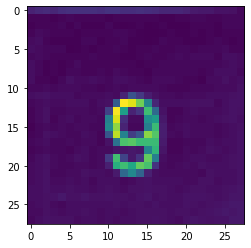

In [31]:
# 3, 8
test = [[103,106,107,105,108,109,109,109,109,108,110,110,108,108,109,108,107,105,105,105,103,100,99,99,97,97,96,93],[92,92,92,91,92,93,92,92,92,92,91,92,92,92,92,92,92,91,91,92,92,93,93,92,92,93,93,93],[91,92,92,92,93,91,93,91,91,91,93,91,90,91,92,90,91,92,90,90,90,92,92,92,91,93,93,93],[92,94,93,92,92,92,91,92,92,92,92,93,93,92,91,90,90,91,92,91,91,92,91,92,91,92,92,92],[94,95,92,91,91,91,91,93,93,91,92,92,93,91,91,90,91,93,92,92,91,91,91,92,93,92,91,92],[95,94,93,93,93,90,91,92,91,92,92,93,92,91,92,92,93,92,92,93,93,92,93,93,93,94,92,92],[93,94,93,92,92,92,92,92,93,92,92,92,91,91,92,93,92,92,93,94,93,94,94,94,92,95,95,94],[95,93,91,92,91,92,94,92,92,92,92,92,92,92,91,92,92,93,93,93,93,93,93,93,93,94,95,94],[95,93,91,92,91,93,93,92,92,93,92,94,93,92,92,91,93,93,93,93,93,93,92,93,95,95,95,93],[95,92,92,91,93,96,94,94,95,94,93,95,95,94,93,92,94,94,94,93,92,92,91,94,94,96,94,95],[93,93,94,93,94,94,94,93,93,92,93,94,93,94,94,94,94,93,92,92,92,93,93,93,94,94,94,96],[95,96,97,95,95,95,93,94,94,94,95,94,104,125,113,101,96,94,94,93,94,94,94,95,95,95,96,97],[93,94,95,94,94,95,95,95,93,95,96,130,228,221,198,153,105,95,95,95,95,96,96,96,93,95,97,97],[92,94,96,93,93,94,94,94,93,94,117,227,167,104,112,185,137,97,92,92,94,95,94,94,94,95,97,96],[92,94,96,92,94,95,93,94,94,93,150,220,108,94,94,159,166,99,92,93,94,94,93,94,95,96,97,95],[91,93,94,93,94,93,94,94,93,93,155,205,104,93,93,149,184,101,93,94,95,94,94,94,93,94,95,96],[92,93,96,95,94,93,93,95,94,92,127,214,151,115,127,204,191,101,94,93,95,94,94,94,93,94,95,97],[93,94,95,93,93,94,93,94,94,92,97,142,189,192,184,184,184,100,92,92,93,93,93,95,94,95,95,97],[92,93,94,93,93,92,94,95,93,94,94,98,98,99,98,153,181,98,92,92,94,93,94,96,95,94,95,97],[93,95,97,94,93,94,96,95,93,94,114,186,118,99,110,195,149,95,93,93,94,95,95,94,94,95,96,97],[94,95,96,94,93,93,94,94,93,94,102,177,185,172,195,188,110,94,93,94,95,94,96,95,95,95,96,97],[94,95,97,93,93,94,94,96,95,95,94,100,137,154,134,102,95,94,94,94,94,94,93,96,95,95,95,97],[94,95,97,94,94,95,94,95,93,95,95,95,93,94,96,97,95,95,95,95,94,94,96,96,94,95,95,97],[95,95,97,95,95,96,95,95,94,95,96,95,94,96,96,97,96,96,95,94,95,96,96,95,95,96,97,98],[95,95,96,97,99,96,96,98,96,96,97,96,96,95,97,98,95,96,95,95,97,97,97,96,95,96,98,98],[94,95,96,94,93,95,95,95,95,95,95,96,95,96,96,95,97,95,95,95,97,96,95,96,97,98,99,99],[94,94,96,95,94,95,95,96,95,94,95,95,94,95,96,96,96,96,95,96,96,95,96,97,98,99,98,99],[93,95,97,96,96,96,94,95,95,94,95,94,95,95,96,96,97,96,95,94,97,98,97,96,97,97,99,99]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[2.1780147e-03 2.1598393e-03 4.0248032e-03 9.3693966e-01 2.6298154e-03
  3.9758649e-02 1.1920992e-04 4.3426030e-03 7.8473082e-03]]
0.93693966
4


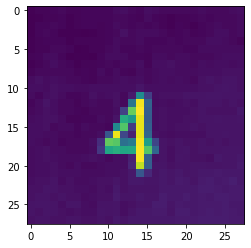

In [32]:
# 4, 5
test = [[83,84,84,85,86,84,84,85,85,85,85,87,88,86,85,88,87,86,86,86,86,86,87,86,86,86,87,88],[82,83,84,84,85,83,84,85,85,85,85,86,86,85,84,87,85,84,83,84,84,85,86,85,86,86,86,87],[82,85,85,86,85,83,84,85,85,84,85,87,86,85,86,85,86,84,83,85,84,83,85,86,87,86,86,87],[82,85,86,85,83,83,83,82,83,84,85,86,89,86,87,87,87,86,84,85,86,84,85,86,88,88,86,87],[83,84,85,85,85,83,84,84,84,84,85,87,86,86,87,85,85,85,86,85,86,86,86,88,88,87,86,84],[83,84,84,86,86,85,82,83,84,84,86,87,85,85,86,85,86,86,86,86,85,85,87,87,87,87,87,87],[84,85,87,87,85,82,83,83,82,85,87,87,87,85,85,84,87,87,86,87,87,86,86,86,87,88,88,88],[83,84,86,88,86,85,83,84,84,85,86,85,86,86,88,84,88,88,89,87,87,86,88,87,88,88,87,88],[84,86,86,86,86,86,84,85,84,87,85,87,85,84,87,86,87,88,88,87,87,87,88,88,88,89,89,89],[87,89,87,88,87,86,86,85,84,86,86,87,88,87,88,86,87,88,87,88,87,86,89,90,89,90,90,89],[88,88,87,89,88,88,87,87,88,88,88,88,88,88,91,88,88,88,88,88,88,88,89,89,90,91,90,89],[87,85,88,89,87,85,85,86,89,87,88,89,86,93,157,111,88,89,89,89,90,90,90,91,91,90,90,90],[85,87,90,88,86,86,84,86,87,86,86,89,86,142,233,131,87,88,87,88,89,88,90,90,90,89,90,89],[86,87,89,88,86,86,85,84,86,86,86,88,111,200,236,128,88,89,88,88,88,89,90,89,89,89,89,92],[87,88,89,89,87,84,84,85,85,87,86,90,177,164,231,127,88,89,88,88,89,89,90,90,91,90,90,91],[88,88,89,86,87,87,85,87,86,86,85,155,194,109,230,129,88,89,88,89,89,90,89,90,90,90,90,90],[88,88,87,87,86,86,85,86,86,88,124,232,115,96,230,133,89,88,87,88,88,88,88,90,90,91,90,90],[88,87,86,87,85,86,86,86,88,102,199,196,139,146,234,169,114,90,89,90,89,89,90,89,90,89,90,90],[87,88,89,87,87,86,86,86,87,107,174,179,174,175,235,195,133,90,88,90,91,89,90,90,90,91,91,91],[87,88,89,88,87,87,87,88,89,88,86,88,88,96,235,129,89,90,88,91,90,89,89,88,92,91,91,92],[87,88,88,89,87,86,88,86,86,87,88,88,88,98,221,128,91,91,89,90,90,91,91,90,90,91,91,93],[87,88,88,89,88,88,88,87,87,87,88,88,89,92,124,100,90,92,91,92,90,91,92,92,93,92,92,92],[88,89,89,90,87,89,87,87,88,89,89,91,89,92,92,91,91,92,91,93,92,90,93,94,92,93,95,92],[89,89,91,90,89,89,88,88,87,89,88,92,89,90,90,90,90,92,92,92,92,92,94,94,93,92,93,93],[89,90,90,89,90,89,89,87,88,89,89,93,90,90,92,91,91,94,92,92,94,92,93,92,94,94,93,93],[90,91,91,90,88,91,91,88,87,90,90,91,88,89,91,91,94,94,91,93,92,92,93,93,93,94,92,92],[90,89,91,90,89,88,89,88,88,91,90,91,88,90,92,92,93,93,90,94,94,92,93,94,93,94,93,92],[89,90,90,89,89,90,90,89,89,90,89,92,90,92,92,92,92,92,92,93,93,93,94,94,94,94,93,93]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.02669405 0.0579316  0.04499337 0.01709785 0.01779808 0.04119738
  0.06066597 0.13846001 0.5951617 ]]
0.5951617
9


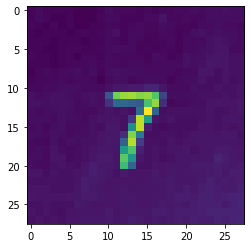

In [33]:
# 4, 7
test = [[92,94,92,92,92,92,91,91,91,92,95,93,93,93,92,93,92,93,93,94,94,95,94,95,95,96,95,95],[92,94,93,91,91,92,90,91,91,93,94,94,92,92,92,94,94,97,93,93,94,93,93,95,95,95,95,95],[93,92,91,93,91,92,90,90,92,92,93,93,92,93,94,93,93,95,94,93,93,92,94,94,95,94,94,93],[92,91,92,92,92,91,92,93,92,93,94,96,92,94,94,93,93,94,93,92,93,95,96,95,96,95,95,94],[92,92,92,91,92,92,92,91,92,92,94,93,92,94,93,92,93,93,94,92,94,94,94,96,97,96,95,94],[92,92,91,91,92,93,93,92,92,93,94,95,94,94,92,93,92,93,93,92,94,94,95,96,97,97,94,94],[93,92,92,91,92,93,91,93,93,92,94,93,93,93,93,92,95,94,92,93,96,95,95,97,98,97,96,96],[92,92,92,91,92,93,93,93,94,93,94,94,93,94,94,93,94,94,94,94,96,95,96,99,98,97,96,96],[91,93,94,93,94,94,95,93,95,92,95,96,95,95,95,94,94,94,94,93,94,94,98,98,95,97,96,96],[92,93,93,93,94,93,94,94,93,91,94,95,95,93,94,95,95,94,92,94,95,95,97,95,95,97,95,96],[93,93,94,94,95,95,95,94,94,94,96,99,99,100,100,103,104,98,94,94,94,96,95,95,97,96,96,97],[96,94,95,96,96,95,94,96,96,95,125,196,205,207,201,204,189,118,95,95,95,95,96,96,96,97,96,97],[96,96,95,96,96,96,94,95,96,95,110,136,136,132,128,187,204,108,93,94,94,95,95,97,98,97,97,99],[95,94,95,95,96,95,94,94,94,96,97,96,97,96,139,226,134,95,96,96,96,96,96,97,96,96,97,99],[95,95,95,94,96,95,95,94,96,97,97,97,96,112,213,165,98,96,97,95,95,95,96,97,96,98,98,97],[94,95,93,95,96,94,94,95,96,95,99,99,96,157,213,101,95,94,95,95,95,95,97,97,96,97,96,97],[95,95,94,96,95,94,95,95,96,97,99,99,107,200,146,95,95,96,96,95,96,97,98,98,97,99,99,96],[94,93,93,96,94,96,95,96,96,97,99,99,132,211,114,96,96,95,97,96,97,97,98,98,98,98,98,97],[94,95,94,97,95,94,95,96,97,99,99,98,164,188,102,96,97,96,97,97,99,96,97,98,100,100,99,99],[95,95,94,97,97,94,95,96,98,100,100,97,191,162,98,96,97,95,96,98,98,98,98,98,103,101,99,98],[95,94,94,96,97,96,95,98,101,99,99,98,183,135,96,96,98,97,98,98,98,100,100,100,101,100,99,100],[97,97,95,97,96,96,97,99,101,100,99,96,100,97,97,97,100,97,99,98,99,99,99,100,101,99,101,101],[96,96,96,96,96,96,97,101,100,99,97,97,97,98,97,98,99,99,100,98,98,98,100,102,100,101,100,101],[97,97,97,96,96,96,98,101,99,98,97,98,99,97,98,98,98,99,100,99,101,99,101,102,101,100,100,102],[98,97,97,97,97,98,98,100,100,99,98,98,99,99,98,98,99,99,100,101,101,100,102,102,101,102,103,103],[96,96,97,96,96,96,100,99,97,97,98,97,99,99,98,98,99,100,99,100,99,101,102,102,102,100,102,104],[97,96,97,96,95,97,98,98,98,98,100,97,99,99,99,99,101,101,100,101,101,101,102,103,103,103,103,103],[96,97,96,97,96,98,98,99,99,99,100,98,99,101,100,98,100,99,100,101,100,102,101,101,103,102,103,104]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.00578034 0.00964818 0.01640501 0.07818496 0.00996959 0.37961963
  0.00220052 0.32906088 0.16913077]]
0.37961963
6


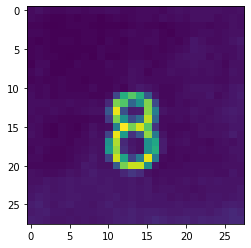

In [34]:
# 4, 8
test = [[99,101,99,98,98,99,99,98,99,99,100,100,98,98,99,99,99,98,100,101,100,101,101,101,101,100,100,101],[99,98,97,96,96,97,96,97,97,95,97,98,97,98,99,99,98,100,99,100,99,101,101,101,99,100,101,100],[97,97,96,95,96,97,97,97,96,95,96,96,95,97,98,97,97,96,97,98,98,99,99,98,99,99,101,100],[98,98,97,96,96,96,96,97,97,96,97,97,98,99,98,98,99,97,96,98,98,99,100,100,99,100,101,101],[97,96,97,96,97,97,96,97,97,95,98,97,96,98,98,99,99,97,98,97,99,103,101,99,99,100,102,104],[97,98,97,96,96,96,96,96,96,98,97,97,97,98,98,97,98,97,98,99,100,103,102,101,100,100,100,102],[97,98,97,97,96,95,96,97,95,98,96,96,97,98,98,97,98,98,99,101,102,102,102,99,101,99,100,102],[96,99,99,96,96,96,98,97,97,97,99,98,98,100,100,99,97,98,100,101,101,102,101,101,100,98,101,101],[98,100,98,96,96,97,97,97,97,97,98,98,98,101,100,97,99,99,101,100,100,101,100,101,100,99,102,101],[97,98,97,97,98,97,97,96,97,97,97,98,99,101,100,99,99,99,99,99,100,100,100,100,99,99,101,101],[99,98,99,97,98,97,97,97,99,97,97,99,97,101,104,102,100,98,98,99,101,102,102,102,101,100,103,104],[100,98,99,97,98,98,98,98,97,97,99,123,177,192,178,132,103,98,98,100,101,101,101,103,99,101,103,105],[100,100,100,99,99,100,99,99,100,99,110,201,191,138,161,202,124,99,98,100,99,100,101,101,101,102,103,104],[100,99,99,100,99,98,99,100,101,101,131,223,127,105,106,203,151,102,100,100,100,102,101,100,102,104,105,104],[99,100,98,98,97,97,97,97,98,98,118,201,162,125,142,214,139,99,99,100,99,101,100,101,102,103,104,103],[100,99,97,96,98,97,96,98,101,99,100,153,227,200,219,192,114,99,98,98,98,99,101,100,101,101,103,103],[101,99,97,96,98,97,97,99,102,100,122,223,167,114,131,205,149,102,98,99,100,99,101,101,101,102,105,102],[99,99,99,98,98,97,99,99,101,101,162,211,110,103,101,161,173,105,99,100,101,99,99,98,100,101,100,102],[98,100,98,97,97,98,99,100,102,101,166,206,113,104,101,162,177,105,98,99,99,99,100,99,100,100,102,102],[99,99,97,97,97,98,100,101,104,101,121,217,172,122,149,222,150,99,98,99,98,99,99,99,99,100,101,102],[98,98,98,98,98,99,100,104,103,101,101,133,200,216,216,160,102,98,99,99,100,100,100,100,100,101,101,101],[101,100,99,99,100,102,101,103,105,103,103,103,109,116,111,101,99,100,100,100,100,100,101,101,100,100,103,101],[101,101,103,102,103,104,103,104,104,103,104,103,103,104,102,104,100,101,100,101,102,101,103,102,103,102,102,102],[102,103,104,102,103,104,103,103,103,104,104,103,103,104,103,104,101,102,102,101,101,100,101,102,102,102,102,104],[103,105,104,103,103,104,104,103,103,103,104,105,103,104,103,104,103,103,101,102,101,102,101,103,103,102,103,104],[105,107,104,102,104,105,103,103,102,104,106,104,104,105,103,103,103,103,103,104,103,103,103,104,103,105,106,105],[104,105,106,103,103,102,103,103,103,104,104,106,105,107,105,106,106,105,104,104,105,105,105,104,106,108,110,108],[106,105,104,102,102,103,102,103,102,103,104,106,106,107,105,107,110,108,106,107,108,106,108,107,108,108,110,110]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[1.0536358e-02 1.0781962e-02 3.9145589e-02 7.9281753e-01 2.7193915e-02
  4.5404263e-02 6.3468865e-04 2.6005233e-02 4.7480442e-02]]
0.79281753
4


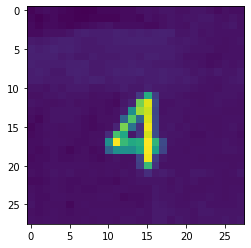

In [35]:
# 5, 2
test = [[85,87,88,87,86,85,84,83,84,86,86,86,87,87,89,90,89,91,91,89,89,91,91,89,87,89,88,88],[86,84,86,87,85,85,84,84,85,85,85,85,87,87,86,90,88,89,91,90,91,91,92,92,90,89,91,89],[87,85,87,87,86,85,86,87,88,90,91,88,88,88,88,87,87,89,91,90,89,92,91,91,90,91,92,89],[87,87,89,89,89,91,94,95,94,94,94,96,95,94,95,94,95,96,95,91,91,92,90,91,90,90,90,90],[93,92,93,94,95,95,94,93,93,94,94,95,95,96,96,96,95,95,93,92,93,92,91,90,90,89,90,91],[96,94,95,97,95,96,94,93,93,93,94,94,94,94,94,94,94,94,94,93,92,91,91,91,89,89,90,90],[95,95,95,95,93,94,92,92,94,93,93,93,94,94,93,95,95,94,94,92,90,90,90,88,88,90,90,90],[95,94,94,94,94,95,95,96,93,93,94,94,94,95,94,94,93,93,93,92,91,91,90,88,89,91,90,91],[94,95,94,92,92,95,96,95,93,93,94,96,95,96,97,94,94,95,94,94,93,91,92,91,93,91,91,93],[94,94,93,93,93,93,95,94,96,95,93,94,94,94,93,94,94,95,94,93,94,93,91,90,90,91,92,93],[91,91,90,92,91,93,93,93,91,91,92,92,94,92,92,95,93,93,92,92,92,91,90,90,89,91,91,91],[89,89,91,91,92,91,91,91,89,90,90,88,91,92,106,169,108,92,92,91,90,89,89,90,91,91,91,90],[91,90,89,89,90,91,89,90,89,89,88,87,92,97,193,215,115,90,90,91,91,90,89,90,91,90,90,89],[89,88,89,91,91,91,91,90,88,89,88,90,94,152,202,211,112,90,91,91,90,90,90,90,90,89,89,89],[88,86,89,91,91,91,90,88,87,89,89,90,128,184,129,214,113,91,91,91,89,90,89,89,89,90,90,90],[86,88,90,90,89,90,90,88,87,88,89,97,194,136,103,219,114,91,92,90,91,89,90,89,89,90,91,89],[87,88,89,90,89,89,89,88,89,89,100,182,166,92,105,213,115,92,91,91,90,88,88,90,89,90,90,88],[88,88,90,90,90,89,88,88,89,90,152,221,177,167,170,222,174,114,91,90,90,89,89,90,90,91,90,89],[88,87,88,90,88,86,88,89,87,88,127,152,153,152,165,221,162,112,90,90,89,90,90,90,90,91,91,90],[87,88,88,90,88,88,89,89,88,87,89,91,89,89,111,219,108,92,90,90,90,90,89,90,89,89,89,89],[88,88,90,90,90,90,90,90,89,89,90,90,89,90,109,177,103,90,90,90,90,90,90,90,90,90,89,90],[89,88,89,91,90,91,89,89,90,89,90,89,91,90,93,101,93,94,92,90,90,92,92,91,90,89,90,92],[87,87,88,90,89,88,88,89,89,88,88,87,89,90,91,91,91,91,89,91,90,91,89,89,90,89,89,89],[89,88,89,90,89,88,89,88,88,89,89,90,90,89,89,89,92,91,90,91,89,89,89,90,90,89,90,90],[90,88,88,90,90,89,89,89,89,90,90,89,87,88,88,89,92,91,91,90,89,90,90,91,90,89,90,91],[91,88,89,89,89,86,89,90,89,89,89,89,89,89,88,90,93,92,91,90,90,91,92,90,90,90,90,91],[89,88,89,90,89,88,89,89,90,90,90,90,90,90,91,90,93,93,92,91,91,90,92,92,91,91,91,91],[90,89,90,90,89,89,89,90,89,90,90,89,91,91,90,90,93,93,90,92,91,90,91,91,91,92,91,92]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.00430129 0.00651698 0.01070963 0.12373874 0.01067659 0.6139403
  0.00107574 0.1404386  0.08860216]]
0.6139403
6


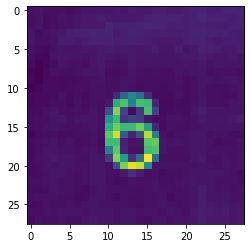

In [36]:
# 5, 7
test = [[98,99,97,97,97,96,97,100,100,100,100,101,100,102,101,101,102,103,101,101,102,104,105,103,103,105,105,104],[97,99,96,97,99,98,100,101,101,102,101,101,101,101,101,104,105,104,105,104,103,104,107,104,104,104,103,104],[97,99,95,97,98,98,100,101,101,101,106,102,104,104,106,107,105,105,103,104,103,104,104,103,103,102,104,104],[99,96,98,99,101,103,104,104,106,104,106,101,103,106,104,103,102,103,102,102,103,105,105,104,104,104,103,102],[100,97,97,98,102,102,101,102,104,104,104,102,103,105,103,102,101,101,101,101,103,104,105,102,101,102,102,102],[98,96,95,98,100,99,99,101,100,101,102,101,101,101,100,101,102,100,100,103,99,101,104,103,102,101,101,102],[97,94,94,99,100,100,99,98,99,101,100,99,99,101,100,100,99,99,99,100,101,101,102,101,100,100,101,99],[96,92,94,96,99,98,98,97,99,101,98,97,98,101,99,100,99,99,99,99,100,99,101,98,100,99,99,99],[93,91,95,98,97,97,98,100,99,100,96,96,97,100,98,97,98,97,97,99,98,99,100,97,98,98,98,97],[94,92,95,96,95,96,96,97,98,99,97,97,99,99,97,97,97,97,97,98,96,97,99,99,98,99,100,98],[92,94,96,96,95,96,97,97,98,98,97,97,99,98,96,97,97,96,97,97,96,97,99,97,97,97,98,100],[94,95,95,96,98,95,97,95,98,98,97,107,136,159,144,108,96,96,96,98,96,97,99,97,97,96,97,100],[94,95,95,97,97,95,98,96,98,97,101,181,195,156,192,189,106,95,95,96,96,98,100,97,97,97,99,99],[95,96,98,100,97,97,98,97,99,97,127,209,121,96,115,193,119,95,96,97,96,99,102,99,99,99,99,99],[96,97,97,99,100,97,99,100,99,97,166,188,113,121,116,99,96,96,98,98,97,98,101,99,100,100,101,102],[95,97,98,99,98,97,97,98,99,97,182,204,189,189,203,174,106,96,98,97,97,98,99,99,99,99,99,99],[93,96,97,97,96,96,97,97,98,97,198,225,132,105,126,220,154,98,96,98,98,100,100,97,98,98,97,97],[95,97,98,99,97,98,96,97,98,95,190,191,104,98,99,197,200,100,98,99,98,100,100,98,96,97,97,100],[95,97,100,99,98,98,97,98,99,97,154,199,106,97,98,191,195,100,97,97,98,100,100,98,98,98,98,99],[95,98,99,101,99,99,98,97,100,99,115,208,173,111,144,235,144,97,97,97,97,100,101,97,97,99,98,100],[95,97,99,98,99,99,98,98,99,100,97,126,205,228,222,162,99,98,98,98,98,98,99,98,97,100,98,99],[95,96,98,100,100,98,97,98,100,100,98,97,101,111,103,97,98,96,97,97,98,99,99,99,99,99,98,96],[97,97,98,99,98,98,97,98,100,100,97,96,97,99,98,98,99,97,97,98,99,100,99,99,98,98,98,97],[96,96,97,100,98,98,97,96,98,99,98,98,98,98,97,98,99,98,98,97,98,99,102,100,98,99,98,99],[97,98,98,98,97,97,96,97,99,99,97,96,98,97,97,98,98,99,96,98,98,99,102,99,99,100,98,98],[95,96,98,97,97,98,97,99,99,98,98,98,98,97,96,98,98,99,98,97,98,99,102,101,100,101,99,100],[97,97,99,98,99,99,99,98,99,99,99,97,99,100,98,99,98,97,99,98,97,101,103,102,101,102,100,101],[95,98,97,97,98,97,97,99,101,100,99,97,99,99,97,96,99,100,98,99,99,100,103,101,101,101,100,101]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[5.6628755e-04 8.7097514e-04 2.3362460e-03 1.1875028e-01 2.6441230e-03
  6.3621807e-01 1.1607211e-04 5.9394117e-02 1.7910378e-01]]
0.6362181
6


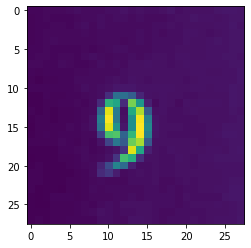

In [37]:
test = [[87,87,88,88,88,89,90,89,89,89,90,90,92,90,91,90,90,91,93,90,91,91,91,91,93,94,94,93],[86,87,88,87,87,87,88,89,89,90,89,90,90,89,90,89,89,89,90,91,91,93,92,92,91,92,93,93],[86,87,87,88,88,87,89,90,88,90,89,89,89,89,89,89,90,90,91,90,91,91,91,91,92,92,94,92],[86,87,88,88,88,88,88,89,88,89,89,89,89,89,90,89,90,89,90,90,92,92,91,90,91,92,93,93],[86,87,88,89,88,88,88,88,88,89,89,89,88,89,90,89,90,90,90,90,92,91,91,92,93,92,93,93],[87,87,88,87,87,87,87,88,87,88,89,90,90,89,89,89,90,90,90,91,91,91,91,92,92,92,93,93],[87,88,88,87,88,88,87,89,90,89,88,89,89,90,89,90,91,91,90,92,92,91,91,92,92,93,93,92],[88,88,87,87,89,88,87,87,88,90,89,90,89,91,91,92,91,91,90,91,92,92,92,92,92,92,93,93],[87,86,87,87,87,87,88,88,89,89,89,89,90,91,91,91,91,91,91,91,91,92,92,91,91,92,92,94],[86,85,86,86,87,87,89,89,89,89,90,91,90,92,91,90,91,91,91,91,90,91,92,92,92,92,92,94],[87,87,87,87,87,87,88,90,89,90,91,94,94,94,92,92,92,92,92,91,91,92,92,91,92,92,94,93],[85,85,87,86,86,87,87,88,89,90,105,143,143,132,101,92,91,92,91,91,90,90,91,91,91,91,94,93],[85,85,86,86,87,87,88,87,89,104,188,179,104,212,169,98,89,92,91,89,92,91,92,92,92,91,94,93],[86,85,86,85,86,86,87,88,89,137,238,151,90,182,225,131,91,92,90,90,91,92,91,91,91,91,93,92],[85,86,86,85,86,86,87,88,91,154,244,149,91,164,243,155,93,91,90,90,90,90,91,91,91,91,92,93],[84,86,86,86,86,88,87,89,91,147,238,166,94,164,245,161,94,91,91,91,90,90,90,91,91,93,93,93],[85,86,87,86,87,87,87,88,88,115,198,201,136,190,244,154,93,91,90,90,90,90,90,91,92,94,94,93],[86,86,86,86,88,87,86,88,87,92,117,148,130,209,224,129,91,91,91,91,91,91,90,91,91,92,93,93],[85,85,85,85,87,87,88,89,87,88,90,93,108,237,180,98,91,90,92,91,91,91,91,92,92,91,93,94],[84,85,85,85,86,86,87,89,88,89,92,109,197,185,106,91,91,90,90,92,91,90,92,92,93,93,93,93],[85,86,85,85,85,86,87,88,89,100,120,156,140,98,90,90,91,90,90,91,91,90,91,91,92,92,92,92],[86,86,85,85,85,85,86,87,89,103,110,97,89,90,91,90,91,90,90,91,91,91,91,91,91,92,92,92],[86,86,85,85,85,86,86,87,88,89,88,88,88,90,90,90,91,89,89,90,91,90,91,91,91,92,93,93],[86,84,85,85,84,86,86,87,89,88,89,89,89,89,89,90,90,89,90,89,90,90,91,91,92,92,94,94],[85,84,85,87,87,87,86,87,88,88,88,89,89,90,89,90,90,90,90,89,91,90,90,90,90,93,94,94],[85,84,84,86,86,86,87,88,87,89,90,89,91,91,91,91,90,90,90,89,90,91,91,91,92,91,92,93],[85,85,85,86,86,86,87,88,89,91,90,89,90,90,91,91,90,89,89,90,90,90,90,91,91,91,92,93],[85,86,85,86,86,87,87,87,87,90,90,89,89,92,92,91,90,89,90,90,90,91,90,91,92,92,92,94]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.03689449 0.00968347 0.03536667 0.09027743 0.0088011  0.28591523
  0.00782875 0.3236262  0.20160669]]
0.3236262
8


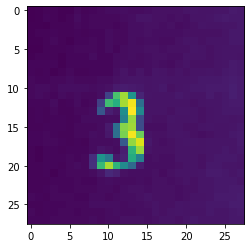

In [38]:
test = [[84,85,86,86,85,85,88,86,87,88,89,89,90,89,89,90,91,91,91,91,92,93,92,92,93,93,95,94],[84,85,87,86,85,86,89,87,88,88,88,88,89,90,92,92,91,91,90,91,90,92,92,93,94,95,94,94],[85,85,84,86,86,86,88,87,88,88,88,87,88,90,90,91,91,90,91,89,90,91,93,92,92,93,93,94],[85,86,86,87,86,86,87,86,87,87,89,88,88,90,90,91,90,90,90,90,91,91,91,91,91,92,94,94],[85,85,86,88,86,85,87,87,88,87,89,88,88,90,89,90,90,89,89,91,92,92,91,92,92,92,94,94],[84,84,86,86,86,87,88,88,88,87,89,87,89,90,90,91,91,90,91,91,91,93,92,91,92,93,93,93],[85,86,86,86,85,87,87,87,89,87,87,89,89,90,89,90,91,91,90,90,92,92,92,91,92,93,93,92],[87,87,87,87,85,87,87,87,87,87,87,89,90,89,89,90,91,90,89,91,92,91,91,91,92,93,95,94],[87,86,87,85,86,88,86,86,87,87,87,90,92,90,92,90,93,92,91,92,91,92,92,93,92,94,95,94],[88,87,87,88,88,89,88,88,88,89,89,91,92,93,93,92,93,93,92,92,92,93,94,94,94,95,96,95],[88,89,89,88,90,90,90,90,89,90,91,95,96,95,94,92,93,94,91,92,93,94,94,95,95,95,97,95],[88,89,88,87,89,88,89,88,88,90,115,194,216,164,100,93,92,92,92,94,93,92,92,95,93,94,97,95],[87,87,87,89,86,87,89,87,88,113,191,180,217,235,140,92,92,92,92,92,92,91,92,93,93,94,95,95],[86,87,86,88,86,86,88,88,89,125,97,93,160,238,157,92,92,92,91,93,93,92,91,92,93,94,94,94],[86,87,86,87,87,86,87,89,89,89,90,90,153,214,119,92,91,91,93,92,92,92,91,92,93,93,92,93],[86,86,87,87,87,86,88,88,88,89,95,140,210,216,120,90,90,90,92,92,91,91,92,93,92,92,93,94],[87,87,88,87,86,86,88,88,90,89,94,140,207,236,204,92,91,91,92,93,92,91,90,91,92,92,94,95],[87,87,88,88,87,86,87,86,89,89,89,90,127,213,230,94,91,90,91,92,93,93,92,93,93,93,93,95],[86,85,87,87,86,87,87,87,89,93,91,89,97,184,215,92,91,91,91,92,92,92,92,93,93,94,93,94],[86,85,87,87,87,88,87,88,104,163,146,94,99,179,151,90,91,90,90,92,92,92,91,93,94,94,94,93],[86,86,87,87,86,88,89,88,105,188,218,184,158,137,96,90,90,90,90,91,92,92,91,94,94,93,93,92],[86,86,87,85,87,88,88,88,89,93,102,98,91,90,90,90,91,89,91,92,92,92,93,95,95,94,93,94],[86,86,86,87,87,87,88,87,87,89,90,89,89,89,90,89,91,91,90,91,92,91,93,93,94,94,94,93],[86,86,87,88,87,87,88,88,88,89,89,88,90,91,91,90,91,91,91,90,91,91,93,93,94,94,95,95],[88,87,86,88,88,88,87,87,89,89,88,89,90,90,91,92,91,91,91,90,91,92,92,93,95,95,95,96],[86,86,87,87,87,88,88,88,90,90,90,90,89,90,90,91,92,91,91,93,92,93,93,94,94,94,96,96],[88,86,87,87,88,88,87,88,88,88,89,90,89,89,90,90,92,91,92,93,92,92,92,94,93,93,94,95],[87,87,87,88,88,88,88,88,89,88,89,89,91,91,91,90,91,92,92,91,93,94,93,93,93,93,94,94]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.03894165 0.02928202 0.0474307  0.01643198 0.01711634 0.03475337
  0.03808887 0.3283529  0.44960213]]
0.44960213
9


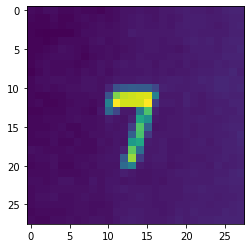

In [39]:
test = [[108,107,109,109,107,107,108,107,107,106,108,109,111,111,112,111,111,113,113,114,115,114,114,113,114,116,117,117],[107,106,106,108,106,106,108,109,108,109,108,109,111,112,113,112,111,113,112,113,115,115,115,114,114,115,116,116],[106,106,106,107,106,107,107,108,109,110,109,110,111,112,113,112,112,113,112,114,115,115,115,114,113,114,116,117],[106,105,104,105,105,105,107,109,109,110,110,110,111,114,113,113,113,113,113,114,114,115,114,114,114,114,116,116],[106,106,105,106,108,108,108,108,110,111,109,110,111,111,112,113,113,112,113,113,115,116,115,116,114,116,117,117],[106,106,107,108,110,109,108,107,109,109,110,109,110,111,112,113,113,112,112,111,113,115,115,115,114,116,116,118],[106,107,108,109,109,109,108,106,108,109,110,109,111,111,113,112,112,112,113,113,114,114,115,115,115,117,117,117],[106,108,109,108,108,108,107,108,109,111,110,112,113,112,113,113,111,113,113,112,114,113,114,114,116,115,116,116],[105,107,109,108,108,109,108,110,109,111,109,111,112,112,112,113,112,113,112,113,113,114,115,115,116,116,118,115],[107,109,109,110,110,109,109,111,111,110,111,113,113,113,114,114,113,114,115,115,114,115,117,116,118,118,117,117],[107,108,109,108,109,110,110,111,111,110,117,137,141,143,142,142,132,116,115,114,114,115,115,116,118,118,117,118],[107,106,106,107,107,109,109,109,110,110,138,211,224,226,228,229,161,113,113,113,116,114,113,115,116,117,116,116],[107,108,106,106,107,108,109,109,108,110,162,236,227,227,227,236,128,114,114,113,116,114,113,114,115,115,117,117],[106,106,107,107,107,109,109,108,107,112,148,132,113,113,157,199,116,112,112,113,114,113,113,114,116,115,115,117],[107,107,108,108,108,109,110,109,109,110,114,112,111,116,182,170,113,112,113,113,114,114,115,114,114,115,116,116],[107,107,107,108,109,107,107,109,109,110,112,111,112,128,200,145,111,112,113,113,114,113,114,114,115,116,117,117],[107,108,108,109,108,109,107,108,110,110,111,112,112,145,198,126,113,113,113,113,114,113,114,114,115,115,116,119],[107,107,107,109,107,107,109,108,108,111,110,112,111,176,182,114,113,114,112,112,113,114,115,113,115,116,116,118],[110,109,108,108,108,109,108,108,108,110,111,112,116,204,152,113,113,114,112,112,113,114,114,114,114,116,116,117],[108,109,109,110,108,108,109,109,110,111,112,112,142,216,128,113,114,114,112,113,113,113,113,114,115,116,115,116],[107,108,108,110,107,107,109,110,109,111,111,111,150,161,114,112,113,113,111,112,113,114,114,113,116,114,115,116],[108,108,108,109,108,108,108,109,110,110,111,112,115,113,111,111,112,112,113,114,114,115,114,114,115,115,117,118],[109,109,108,109,111,111,109,109,112,110,112,112,111,112,111,111,112,111,113,113,114,114,114,114,116,116,117,117],[108,109,109,110,110,110,110,110,111,110,112,113,114,113,113,113,112,113,113,113,115,115,116,115,115,115,116,116],[108,110,110,111,109,109,110,111,110,110,111,112,112,113,114,113,112,113,113,113,114,114,115,115,114,115,115,116],[108,109,109,109,109,109,110,110,109,109,110,112,113,113,113,113,112,112,113,114,114,115,115,114,115,115,116,117],[107,108,108,108,108,109,110,110,109,110,110,113,113,114,114,113,113,112,113,115,114,116,115,115,115,117,116,117],[108,107,107,109,109,110,109,110,111,111,110,112,114,115,114,113,113,113,114,116,114,115,116,116,117,117,117,117]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[1.8209810e-04 3.5239654e-04 6.8360975e-04 3.9659891e-02 7.4462069e-04
  8.0296016e-01 6.2076935e-05 6.0007911e-02 9.5347255e-02]]
0.80296016
6


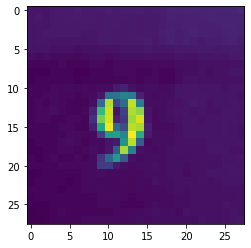

In [40]:
test = [[81,81,80,82,83,82,84,82,83,83,84,83,84,84,84,83,84,84,87,87,87,87,87,87,88,88,88,89],[80,82,80,82,82,83,83,82,83,82,83,83,83,83,82,83,83,84,86,85,85,86,86,87,87,87,87,87],[80,81,80,82,82,82,82,83,82,82,83,83,82,83,82,83,83,84,85,85,86,86,85,85,86,87,87,86],[80,81,82,82,82,82,82,81,81,82,83,82,82,83,82,83,83,85,86,84,85,87,85,85,85,86,87,86],[80,81,81,80,80,80,80,80,81,82,83,82,82,83,83,84,82,84,86,84,85,84,83,84,84,85,86,84],[80,80,80,78,79,78,77,78,78,79,79,79,80,80,80,82,81,81,81,82,82,82,83,83,82,83,83,83],[77,76,77,76,76,76,75,76,77,77,76,77,78,78,78,79,78,78,78,80,79,79,80,80,81,80,82,83],[73,74,73,74,75,74,73,74,75,75,74,75,75,75,75,75,76,76,76,77,77,77,78,78,78,78,79,79],[71,72,72,74,74,73,71,71,73,74,73,75,75,75,74,74,75,74,73,76,77,77,78,77,78,79,80,80],[71,73,73,73,74,73,72,73,74,74,74,74,74,75,74,75,75,74,73,76,79,79,78,78,78,78,78,78],[73,74,74,76,75,76,75,76,75,76,76,83,85,78,76,77,77,76,77,80,81,81,80,80,80,79,80,80],[73,74,75,76,75,75,74,75,76,81,131,134,144,139,85,77,76,77,77,80,81,81,81,80,80,80,80,79],[73,75,74,76,75,74,74,74,77,129,215,105,128,219,141,77,77,77,78,79,80,82,81,79,80,80,81,80],[73,75,75,77,75,74,74,75,87,180,221,80,102,214,205,80,76,77,79,80,80,79,80,79,79,81,81,81],[74,75,75,74,74,75,75,74,93,199,223,86,97,209,223,81,76,77,78,79,80,80,79,80,80,81,81,80],[73,74,73,74,75,75,74,74,85,170,230,128,109,216,212,85,76,76,76,78,80,80,80,80,80,81,80,79],[73,74,74,73,74,76,76,75,76,102,161,164,146,233,172,83,77,77,77,78,80,80,80,80,80,81,80,79],[72,73,74,74,76,77,76,74,76,76,80,83,156,217,119,76,77,77,77,79,79,79,79,80,80,80,80,80],[72,72,74,74,75,75,74,75,77,76,81,117,212,144,79,77,76,77,78,79,79,79,79,80,81,80,79,79],[73,72,73,75,74,74,75,74,76,96,125,160,118,78,76,77,77,77,78,78,78,79,79,79,79,80,80,81],[73,73,73,74,75,75,75,76,76,99,100,83,77,76,77,77,78,77,78,78,77,78,79,78,79,81,81,80],[71,72,73,74,74,74,74,75,76,77,76,76,76,76,76,77,77,77,78,78,76,78,78,80,80,80,81,81],[71,73,74,73,73,72,74,75,76,75,75,75,76,75,76,76,78,77,77,78,78,78,79,78,79,80,80,80],[73,73,73,73,72,73,74,75,75,76,75,75,75,75,76,75,76,76,77,78,77,78,78,78,78,79,79,79],[72,73,73,73,73,74,74,74,74,75,76,76,75,74,75,75,75,76,76,77,77,78,78,78,78,78,78,79],[72,72,72,73,73,74,74,73,74,76,75,75,74,74,74,75,77,76,76,77,77,78,78,78,78,80,79,79],[71,72,72,73,75,74,73,74,74,74,74,75,75,76,76,77,78,77,77,76,79,78,78,78,78,79,80,79],[71,71,72,73,74,73,74,75,76,76,76,76,75,76,77,76,77,77,77,77,77,77,79,78,78,79,80,81]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.04975073 0.00685366 0.01508809 0.01442029 0.0058585  0.22643037
  0.00648345 0.6328145  0.04230041]]
0.6328145
8


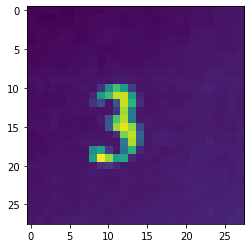

In [41]:
test = [[73,74,74,75,73,73,74,75,75,74,76,76,77,77,76,75,76,77,78,78,78,79,79,79,80,81,81,81],[74,73,72,73,74,73,75,75,76,77,76,76,75,77,76,76,75,77,77,79,77,78,79,78,80,80,81,81],[74,74,74,74,74,74,76,75,76,77,77,77,76,76,77,76,76,77,77,78,76,79,80,79,80,80,81,82],[74,75,76,74,76,76,74,75,76,77,79,78,78,78,78,77,76,78,78,77,77,80,82,81,81,80,82,81],[73,75,75,76,77,76,74,76,77,78,78,77,78,78,78,77,77,78,79,79,79,81,81,82,81,81,81,81],[75,76,75,76,76,77,77,78,77,76,76,77,77,77,77,78,78,79,80,80,81,82,81,82,81,81,81,82],[75,76,76,77,77,77,77,78,78,76,78,76,78,78,78,78,78,80,81,81,81,82,82,82,82,83,83,84],[75,76,77,77,76,77,78,78,79,76,79,79,78,78,78,79,79,79,80,81,81,82,82,82,82,83,83,83],[77,78,78,78,77,79,78,80,80,78,79,80,81,80,79,80,81,80,82,81,82,82,82,84,85,83,82,83],[79,79,78,81,80,80,79,80,81,80,80,83,83,82,81,81,82,82,82,84,83,83,82,84,84,84,84,84],[77,79,78,79,78,79,80,82,80,94,146,176,153,99,81,81,81,82,81,83,83,83,85,86,84,83,84,84],[77,78,77,78,78,79,79,79,88,153,175,207,209,154,86,80,81,80,81,81,81,82,83,84,83,83,84,83],[77,77,77,78,77,79,79,80,94,108,80,110,209,168,90,79,80,82,81,80,83,83,84,83,82,83,84,83],[78,78,79,79,79,79,80,79,81,80,80,95,199,132,83,80,81,82,82,83,83,83,83,84,82,83,84,83],[78,78,78,81,78,78,78,78,79,84,111,179,204,132,82,82,81,82,83,83,83,83,83,84,82,83,83,84],[78,79,79,81,79,78,79,78,79,81,115,198,215,197,106,83,82,83,82,81,82,83,83,83,82,83,82,84],[76,78,79,79,79,78,79,80,80,81,81,91,191,207,119,82,84,85,84,83,83,83,83,84,83,84,84,85],[77,77,78,79,79,80,80,82,82,83,81,81,135,203,115,82,84,84,84,83,83,84,84,86,84,84,83,84],[77,78,78,79,80,79,79,80,145,158,97,82,129,168,89,82,84,81,82,82,83,84,85,85,85,84,85,84],[78,79,80,80,80,80,80,80,157,221,198,156,161,89,82,83,81,83,84,83,83,85,85,84,83,83,84,85],[80,80,80,80,81,81,80,80,82,92,97,89,83,82,82,82,83,84,84,84,84,85,85,84,84,84,84,85],[79,79,80,81,81,80,81,82,83,82,81,82,83,82,81,83,82,83,84,84,84,84,84,85,85,86,84,85],[79,79,80,82,81,80,81,82,82,81,81,81,83,83,82,83,83,83,83,84,86,85,84,84,85,85,84,84],[79,80,80,81,80,80,80,82,83,82,83,82,83,82,82,82,82,84,84,83,85,85,86,85,85,85,85,86],[81,80,80,82,81,80,81,83,81,83,83,83,83,82,82,83,84,84,84,84,85,86,85,84,85,85,86,86],[80,81,81,82,82,81,81,83,82,83,83,83,82,83,83,84,85,84,85,84,84,85,85,87,85,86,86,86],[80,81,82,81,81,82,82,83,84,83,82,83,83,83,84,85,85,85,85,84,84,85,86,88,85,86,87,88],[81,82,81,83,83,84,84,84,83,83,83,84,85,84,84,84,85,85,86,85,85,86,86,86,87,87,88,89]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.24413058 0.00666292 0.45765394 0.06409944 0.02816109 0.0072699
  0.01633828 0.06269173 0.11299212]]
0.45765394
3


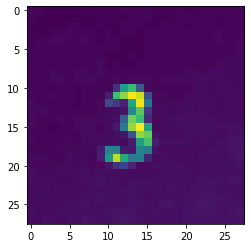

In [42]:
test = [[60,60,59,58,58,58,59,59,58,59,59,60,60,60,60,60,59,59,59,60,59,59,60,61,60,60,61,61],[60,59,59,58,58,58,59,59,59,59,60,59,59,60,60,60,59,59,59,60,60,61,61,60,59,61,61,61],[59,58,59,59,59,60,60,59,59,60,59,59,60,60,60,59,59,60,60,60,59,60,60,60,61,61,61,61],[59,59,59,61,61,62,60,60,60,59,60,59,60,60,58,60,60,60,60,60,60,61,60,61,62,61,61,61],[59,60,61,62,62,61,61,62,60,59,61,60,59,59,59,60,61,60,60,60,61,61,61,61,62,61,61,62],[61,60,61,61,61,60,61,61,61,60,61,60,59,59,59,61,61,60,61,60,60,61,60,61,61,61,61,62],[60,60,60,61,60,60,60,61,61,61,59,59,59,60,59,60,61,60,60,60,61,61,60,61,61,61,62,62],[60,60,61,61,60,61,60,60,61,62,59,60,59,59,61,61,61,61,60,61,61,61,61,61,62,62,62,62],[61,60,61,62,61,61,62,62,61,62,61,61,60,60,60,61,61,61,61,61,62,62,61,63,63,63,62,62],[60,60,61,62,62,61,62,62,62,61,61,62,61,62,62,62,61,62,62,62,62,62,64,63,62,62,62,62],[60,60,61,61,61,60,59,60,60,60,61,81,150,169,105,62,61,61,61,61,61,62,63,62,63,63,63,62],[60,61,61,62,60,60,59,60,60,61,71,172,196,220,210,98,62,62,61,61,62,62,63,63,62,63,63,62],[63,61,61,61,61,60,59,60,61,62,95,83,73,155,219,121,62,62,62,62,63,63,63,63,62,62,62,63],[62,62,62,61,61,61,61,61,61,62,63,63,67,136,180,85,63,63,62,63,64,63,64,62,62,63,63,63],[63,61,61,61,62,61,62,62,62,62,63,65,110,188,171,78,62,62,64,65,65,64,64,65,63,63,63,63],[62,61,60,59,60,61,62,63,63,61,63,69,127,198,223,153,62,63,63,64,64,64,64,64,64,64,64,64],[61,61,61,61,61,61,61,62,63,62,62,64,67,101,195,186,66,63,63,63,64,65,64,64,63,63,65,66],[62,61,61,61,61,62,61,62,63,63,64,65,63,71,151,175,71,64,64,64,64,63,64,63,64,64,67,66],[61,61,61,61,62,62,62,62,62,71,133,131,70,69,134,128,66,63,62,63,63,63,63,64,64,65,66,67],[63,62,62,61,61,63,62,62,61,71,146,206,159,127,129,73,63,64,63,63,63,63,64,65,64,64,66,67],[62,62,62,62,62,62,63,63,62,62,67,82,90,76,63,63,64,64,65,64,64,63,64,65,64,64,65,66],[64,62,62,62,63,62,63,64,63,64,64,64,64,63,63,63,63,65,64,65,64,63,64,65,65,64,65,65],[63,63,62,63,62,62,63,64,64,66,65,64,63,64,64,64,65,65,65,64,65,64,66,66,66,65,67,66],[63,63,64,63,63,63,63,63,64,64,65,64,64,66,64,64,65,65,66,65,65,66,66,66,65,65,65,65],[63,64,63,63,63,63,63,64,65,66,64,64,64,66,64,63,65,65,65,64,66,65,66,67,66,66,65,64],[63,63,62,63,63,64,65,66,65,64,64,64,65,66,66,65,65,66,67,64,66,66,68,67,66,65,66,66],[64,63,63,63,64,65,64,65,65,65,66,67,67,67,65,64,66,65,65,65,66,66,67,67,66,65,66,67],[63,63,64,64,63,65,64,67,65,65,65,67,68,67,66,65,65,65,65,65,66,66,66,66,65,66,66,66]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[4.3088556e-04 3.0231674e-04 7.3533511e-04 3.0595738e-02 7.8065117e-04
  5.5983973e-01 9.1467555e-05 1.9236861e-01 2.1485536e-01]]
0.5598397
6


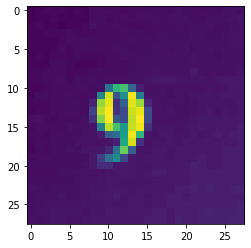

In [43]:
test = [[74,76,78,78,78,77,78,77,79,79,79,79,78,79,79,79,80,80,80,82,80,80,79,79,80,81,81,80],[75,76,77,78,76,77,77,77,79,80,78,79,80,79,80,80,81,80,81,81,81,80,80,81,81,81,82,83],[76,78,77,76,75,77,77,78,81,79,79,80,79,78,78,79,80,80,80,81,80,81,81,81,80,80,81,82],[77,77,78,78,78,79,78,78,78,79,79,79,80,79,80,79,80,81,80,80,80,81,81,80,80,81,82,82],[76,76,77,77,78,79,79,80,79,79,79,79,80,80,80,80,80,81,81,81,81,81,81,81,81,81,82,82],[76,76,77,77,79,78,79,80,79,79,79,80,81,79,80,80,82,81,80,81,82,80,81,82,81,81,82,82],[76,78,77,78,78,78,79,78,78,78,79,79,81,80,80,81,81,80,81,82,81,82,81,81,80,82,81,81],[77,77,77,79,79,78,77,77,76,78,79,79,79,80,81,81,82,81,81,81,81,82,81,81,81,81,81,82],[78,78,79,79,79,78,78,78,79,79,79,79,79,80,81,82,83,82,82,82,81,85,81,81,81,81,82,83],[78,78,79,79,80,78,80,79,80,79,80,80,80,81,81,83,84,84,84,83,82,83,83,82,83,84,84,84],[77,77,78,79,79,79,80,80,79,80,136,179,186,126,86,81,81,82,81,82,82,81,82,83,82,83,85,84],[77,79,79,79,79,80,79,79,80,145,223,116,153,231,141,82,82,82,80,82,81,83,83,83,83,85,85,84],[78,78,78,79,79,80,80,79,90,208,228,95,123,225,209,92,82,81,82,82,81,82,83,83,83,83,83,84],[77,78,78,79,79,80,80,79,105,217,232,97,111,221,228,110,82,82,83,81,81,82,83,84,82,84,83,84],[80,81,79,78,79,79,79,81,97,204,233,119,111,217,233,111,82,82,82,82,82,83,84,84,84,85,84,85],[78,79,79,79,79,81,81,81,82,146,217,186,159,219,229,97,83,83,83,82,83,84,85,84,84,84,84,86],[79,79,78,79,80,80,80,82,82,86,122,132,163,230,179,83,82,84,84,83,83,85,83,84,86,84,86,86],[78,79,79,80,80,80,82,82,82,82,83,88,169,223,96,81,83,83,85,83,85,84,84,85,84,85,85,86],[77,79,78,80,80,81,80,83,83,84,91,134,197,123,83,82,84,85,83,84,85,85,84,84,85,86,87,86],[79,80,80,80,80,80,80,80,85,104,132,151,108,85,83,84,84,84,83,85,84,85,86,84,84,86,87,87],[80,80,80,80,80,80,80,82,84,95,94,84,85,84,83,83,85,85,85,85,85,88,87,84,85,86,87,87],[79,79,79,79,81,81,82,82,82,82,83,84,84,84,83,84,86,86,84,84,85,86,86,86,86,87,87,87],[80,80,80,80,80,80,82,82,82,83,84,83,83,83,83,83,84,84,84,85,85,86,86,87,86,87,86,86],[82,81,80,81,81,81,81,82,83,83,85,84,84,83,84,85,84,84,84,86,86,88,86,88,87,86,88,89],[80,81,81,81,83,81,82,82,83,84,84,86,83,84,85,83,84,85,86,86,85,86,87,87,86,86,86,87],[80,81,82,82,82,82,82,83,83,83,84,83,83,85,84,83,84,85,86,87,86,86,87,87,87,87,87,89],[81,82,82,83,83,83,83,82,83,83,85,85,84,85,85,85,86,86,85,86,86,87,88,89,88,88,88,90],[82,81,82,83,83,82,82,83,84,84,84,85,84,84,84,86,87,86,85,88,86,86,88,88,88,88,90,89]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.01684245 0.01075159 0.08665543 0.06929567 0.01587485 0.13123362
  0.00643578 0.2760166  0.38689402]]
0.38689402
9


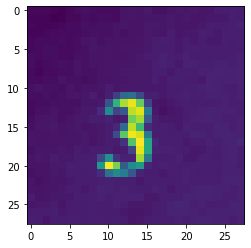

In [44]:
test = [[119,119,119,118,117,119,121,122,121,120,120,120,123,124,123,125,122,122,124,125,124,125,124,124,126,126,127,126],[118,118,118,116,117,119,119,121,120,121,121,120,123,124,123,124,124,124,125,124,125,124,124,125,125,125,127,126],[119,118,118,118,119,120,120,122,121,122,122,123,124,123,123,125,125,124,125,124,124,124,125,126,126,126,127,128],[118,118,119,120,120,120,120,121,122,122,122,123,122,123,123,125,124,124,126,124,125,125,127,126,125,127,127,127],[119,120,120,120,121,120,121,123,124,122,123,123,123,123,124,125,126,127,126,125,126,125,126,125,125,127,126,127],[119,120,121,121,120,120,121,122,124,123,124,123,124,124,124,125,126,126,126,125,127,127,126,126,126,126,126,126],[121,120,121,121,120,120,122,122,123,123,124,123,123,124,125,126,126,128,126,126,128,126,126,126,126,126,127,128],[121,119,120,121,122,121,123,122,123,123,124,124,124,124,125,125,127,128,127,125,128,128,127,127,128,128,127,128],[120,118,120,120,121,121,123,122,122,123,124,124,125,125,125,125,127,127,125,127,127,126,128,128,129,128,128,129],[120,120,121,121,123,122,122,121,122,123,123,124,124,125,125,125,127,125,127,127,126,126,125,129,128,128,128,129],[122,123,122,122,121,123,122,123,123,124,126,124,125,125,125,125,125,125,126,126,127,127,128,129,128,127,126,128],[121,121,122,121,122,123,124,124,126,123,127,140,161,164,145,127,127,125,126,127,128,127,127,128,128,128,127,128],[120,121,121,122,122,122,122,124,124,125,150,202,232,244,217,143,124,123,125,126,127,126,127,126,127,128,127,127],[120,122,122,123,122,122,123,125,125,132,180,143,153,235,242,170,125,122,124,125,126,127,128,129,128,128,128,127],[121,123,124,124,122,123,125,125,127,126,128,125,127,219,230,154,127,125,125,125,126,128,128,129,128,127,127,128],[122,124,124,125,123,124,125,123,124,125,126,131,162,235,206,133,127,127,126,125,128,127,127,127,129,129,127,128],[124,123,123,124,123,124,124,125,124,125,126,146,214,245,239,170,126,127,126,127,127,129,128,127,129,129,128,128],[124,123,123,123,124,123,124,125,123,125,126,126,135,212,248,196,131,126,127,127,125,126,126,128,127,128,129,131],[122,124,124,124,125,124,126,125,126,126,127,125,126,143,243,196,129,128,128,127,126,125,125,127,126,128,129,127],[123,125,124,126,125,125,126,126,127,146,183,135,128,128,230,169,126,126,127,128,125,125,127,127,126,128,129,127],[123,123,123,125,125,127,126,127,126,187,247,221,155,180,188,130,126,128,127,127,127,127,127,126,127,128,128,126],[122,123,123,125,124,126,126,126,127,133,166,178,172,152,129,126,126,125,126,127,128,127,126,127,126,128,128,128],[124,122,123,124,124,125,126,126,126,127,128,127,127,127,125,127,127,126,126,127,128,126,127,127,127,129,129,129],[124,123,124,124,125,126,126,125,126,129,128,127,128,127,126,126,128,127,125,127,127,128,129,129,128,128,127,128],[126,123,124,125,125,125,127,126,127,128,127,128,128,128,128,125,125,126,127,127,129,128,129,129,128,127,127,129],[124,125,125,126,124,126,126,126,127,126,126,128,127,125,125,125,126,127,129,130,129,127,128,126,127,127,129,129],[126,126,126,127,125,126,126,126,127,126,126,126,125,124,124,125,126,127,129,129,129,128,127,128,128,128,128,129],[127,126,124,126,126,127,127,126,127,127,126,127,126,124,125,126,127,127,127,128,127,128,129,129,128,128,126,128]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[0.00242662 0.00596229 0.00823183 0.05674922 0.00609311 0.5569701
  0.00093593 0.21267703 0.14995383]]
0.5569701
6


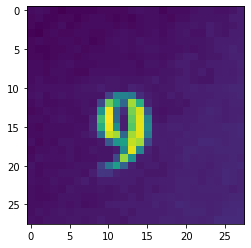

In [45]:
test = [[135,136,135,133,131,133,133,133,133,134,134,134,134,136,137,136,136,133,135,135,135,137,138,138,137,137,138,140],[134,135,133,133,134,134,132,134,135,135,134,133,134,133,135,136,136,135,134,136,136,138,138,138,138,138,140,140],[134,132,133,134,136,133,134,135,135,135,135,134,135,134,135,136,136,135,136,138,138,139,138,140,139,138,139,140],[132,131,134,135,134,134,135,135,134,134,135,136,137,136,135,136,137,135,137,138,139,137,137,140,139,138,140,140],[134,135,134,134,135,135,134,135,133,134,136,137,137,136,138,137,137,136,137,138,138,138,138,139,140,140,140,141],[134,133,133,134,134,135,136,134,135,135,136,136,137,136,137,138,138,137,137,137,138,137,138,139,140,141,143,141],[134,134,133,134,135,135,134,135,136,136,136,136,136,135,136,137,137,136,137,139,140,140,138,139,139,140,142,142],[135,135,134,135,136,137,135,135,135,136,136,136,137,137,135,138,138,137,139,140,140,139,139,140,140,141,141,143],[135,135,134,136,136,135,134,134,137,137,137,137,137,137,136,137,137,138,138,139,140,139,140,138,140,141,140,142],[135,137,135,135,136,135,136,137,138,138,139,139,138,138,138,139,140,138,139,140,140,139,138,138,141,141,141,143],[136,137,137,137,137,137,138,139,139,140,139,139,138,142,140,139,138,139,139,140,141,142,141,142,142,143,144,144],[137,138,135,137,138,137,138,138,138,138,155,185,184,181,147,140,139,138,140,139,141,141,141,141,142,142,143,144],[135,137,135,135,136,136,137,138,137,157,226,202,172,235,208,143,139,138,138,139,138,140,141,142,142,141,143,143],[134,135,137,136,137,136,136,138,139,194,250,171,147,227,244,165,138,137,138,138,140,140,142,144,143,141,142,142],[136,136,135,137,138,137,136,136,143,215,252,174,141,223,246,185,139,138,140,140,141,141,143,143,142,141,142,143],[135,134,136,136,136,136,137,137,144,207,250,191,141,220,247,189,141,140,142,142,141,142,142,143,143,144,144,145],[135,135,136,136,136,136,137,139,141,175,242,235,172,235,246,182,141,140,141,141,143,142,143,143,143,143,144,145],[137,134,136,135,138,138,137,137,137,139,165,194,200,241,235,158,141,141,140,142,142,142,145,145,144,143,144,144],[134,136,136,137,136,138,136,137,139,138,138,140,188,247,187,142,139,141,140,141,144,144,143,143,144,144,144,144],[135,138,137,137,137,138,136,137,137,138,138,159,233,193,141,140,139,140,140,142,144,142,143,142,143,143,144,143],[138,135,136,136,136,137,138,138,138,154,177,199,169,142,139,140,140,139,140,141,143,142,142,141,143,144,144,145],[137,135,137,137,138,138,138,137,141,150,149,143,141,140,140,139,139,139,141,142,142,142,141,142,143,145,144,143],[137,136,136,138,137,137,139,140,138,140,140,140,140,140,139,140,140,141,141,143,143,143,141,143,142,145,144,143],[136,135,136,137,136,139,138,138,138,139,138,139,140,139,139,140,139,140,141,143,143,142,143,143,143,143,141,143],[136,135,135,136,138,138,138,137,137,138,138,139,139,140,139,141,142,142,143,142,143,142,142,142,142,143,144,144],[136,136,137,137,138,137,138,136,137,138,140,141,141,141,140,140,143,141,142,145,144,143,143,142,143,144,145,145],[136,138,137,138,139,138,139,139,139,139,139,139,140,139,141,141,141,141,142,142,144,144,144,142,143,145,145,146],[137,136,138,138,138,139,139,138,139,140,139,139,138,140,141,141,141,143,143,142,143,143,142,143,146,146,146,146]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[7.2754380e-09 9.7120619e-08 6.1765284e-05 3.5740558e-07 5.4688380e-06
  8.3711609e-04 3.9487498e-09 9.9903548e-01 5.9718932e-05]]
0.9990355
8


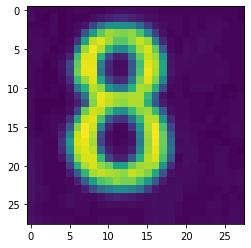

In [46]:
test = [[65,64,63,63,62,64,65,65,64,64,65,66,67,67,66,65,65,64,64,64,64,64,64,63,63,63,63,62],[67,63,62,66,62,63,64,64,67,71,76,80,81,78,73,68,67,65,65,65,63,65,64,65,65,64,63,62],[64,63,64,66,62,64,66,71,94,125,147,148,146,141,119,90,73,67,65,66,64,65,64,66,66,65,63,63],[65,65,64,65,62,64,68,105,155,188,207,201,198,202,182,141,93,69,64,65,64,65,65,66,66,64,63,63],[66,66,65,64,62,65,86,158,215,223,208,188,187,202,216,205,138,79,65,63,66,65,67,66,65,63,63,63],[66,66,65,62,64,68,128,205,228,212,172,142,142,172,208,221,190,110,66,63,67,65,67,66,64,63,63,63],[66,66,63,63,66,77,179,223,223,170,100,74,78,125,190,217,206,150,69,65,67,66,65,65,65,64,63,63],[65,65,62,63,69,97,190,225,225,135,80,66,67,105,179,224,213,160,70,66,66,66,65,65,65,65,64,63],[65,64,62,62,68,94,194,225,226,129,79,67,68,108,183,227,210,160,71,66,65,65,65,65,66,66,64,64],[65,63,61,62,66,83,176,204,223,162,99,79,82,131,197,223,199,140,68,65,64,65,65,65,65,65,63,64],[66,64,62,63,63,72,129,169,214,202,150,130,130,169,209,207,169,101,65,65,64,66,66,66,64,62,62,63],[66,64,63,63,62,67,84,127,204,226,217,210,206,211,211,175,113,71,64,66,63,64,64,62,64,62,63,65],[65,62,62,62,62,66,75,105,199,225,215,206,202,211,210,169,109,74,65,65,65,64,64,62,64,63,65,65],[65,62,61,63,64,68,97,191,220,214,179,150,145,177,203,206,174,110,68,65,65,63,64,64,64,64,65,65],[66,62,63,65,66,84,163,219,224,183,112,87,86,125,174,213,213,150,79,65,66,64,64,65,64,65,65,65],[65,62,63,66,72,109,200,231,219,137,78,65,65,88,150,210,229,182,96,66,66,65,65,63,63,64,66,66],[66,63,64,65,79,137,217,231,212,100,68,63,64,71,135,206,231,192,111,67,67,65,64,61,62,64,65,66],[67,65,64,64,85,153,221,226,208,95,69,63,65,69,132,204,228,193,119,66,67,66,64,63,64,62,63,64],[68,65,64,64,82,144,215,223,214,119,76,67,67,75,142,206,225,191,123,67,67,67,63,64,65,66,63,61],[69,65,63,63,72,115,202,221,222,175,96,76,76,107,169,213,222,182,109,64,68,67,64,64,66,66,63,63],[69,66,64,63,64,92,169,210,221,204,192,157,157,191,206,210,207,151,83,65,67,66,65,63,66,66,64,64],[70,66,64,63,63,74,111,172,209,214,211,207,202,216,210,199,162,105,69,66,66,66,65,64,66,66,65,66],[70,66,64,63,63,65,78,112,157,183,191,203,197,197,179,153,109,74,66,67,66,66,64,65,65,66,66,67],[70,67,65,63,64,65,66,75,100,121,132,144,143,137,123,94,73,67,67,68,65,65,64,64,64,66,64,65],[70,66,65,63,65,67,66,66,66,69,74,78,75,73,69,67,68,67,67,67,64,63,63,64,65,64,66,63],[68,65,64,63,65,67,66,65,64,66,67,67,66,67,65,66,69,68,67,65,63,64,64,66,66,63,65,65],[67,65,64,64,64,64,65,65,63,64,64,64,64,63,64,66,68,67,67,65,63,64,64,65,65,63,66,66],[70,67,66,65,65,65,64,63,64,66,65,66,66,63,63,67,69,67,67,64,63,65,65,65,66,65,66,66]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[7.5403172e-05 2.6710320e-04 1.1915753e-02 1.7126309e-03 5.4212862e-01
  1.9515155e-01 2.8664994e-05 1.9806217e-01 5.0658163e-02]]
0.5421286
5


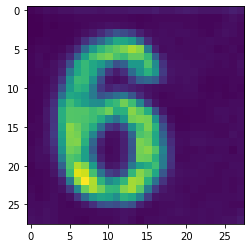

In [47]:
test = [[51,53,55,54,56,56,58,58,58,57,58,58,58,59,59,59,61,58,58,60,61,60,58,58,58,59,62,60],[49,50,52,51,52,52,53,53,53,53,53,53,53,52,51,52,53,53,53,53,53,53,52,52,52,54,56,54],[49,49,51,50,51,51,52,53,54,55,57,56,55,54,52,53,53,54,54,54,53,53,52,52,53,55,55,53],[49,49,51,51,51,51,53,56,60,68,79,90,85,78,63,56,54,55,54,55,55,54,53,52,54,56,55,53],[50,51,52,51,51,52,57,71,87,101,123,144,142,133,103,69,56,55,55,53,54,54,54,55,54,54,53,53],[51,53,53,52,53,58,70,104,134,153,163,169,176,186,179,116,64,54,55,54,54,54,55,54,52,53,54,52],[52,54,52,53,57,67,99,139,161,170,175,162,157,169,169,155,97,63,55,55,54,54,54,55,54,54,53,54],[52,54,53,56,61,87,141,155,144,135,114,88,98,134,134,163,125,72,57,56,56,55,55,54,53,54,53,56],[52,53,54,56,65,111,143,154,143,108,73,61,70,104,130,149,130,76,58,56,56,56,54,53,53,53,53,55],[51,52,53,58,74,129,157,155,128,85,58,55,58,75,97,102,95,69,57,55,56,55,53,51,52,52,53,53],[52,52,54,60,88,135,152,147,114,76,64,69,67,63,60,57,55,54,54,54,55,55,52,51,52,51,53,52],[52,52,55,64,108,144,140,134,114,90,96,106,111,91,69,58,54,52,53,54,54,54,53,52,53,51,52,53],[51,52,57,70,133,158,146,137,127,126,149,156,173,158,121,78,58,53,53,53,53,53,52,53,53,53,54,54],[51,52,59,73,148,165,164,164,158,163,172,148,150,178,167,147,88,59,52,51,52,52,52,53,55,55,54,55],[51,53,59,73,148,165,164,162,158,147,124,109,133,173,176,174,130,75,54,51,51,52,52,53,54,55,53,55],[53,53,58,74,145,179,171,160,146,109,75,69,87,130,158,175,150,89,59,52,52,53,53,53,53,53,54,55],[52,53,59,76,140,177,174,155,121,80,56,56,65,100,162,168,144,99,65,54,54,55,55,54,53,53,56,54],[52,54,59,73,137,176,177,149,101,63,54,55,63,92,175,170,145,106,69,55,54,56,56,55,55,55,54,55],[53,55,58,68,131,172,168,139,94,59,53,55,63,90,174,178,164,119,72,54,53,53,54,53,54,54,51,55],[53,55,55,64,118,164,159,138,105,63,54,55,64,93,172,170,150,115,73,53,53,54,54,55,55,54,54,54],[51,54,54,60,99,163,188,177,136,78,58,60,71,112,139,146,158,115,71,55,54,54,55,54,53,53,55,55],[51,52,53,58,81,157,199,195,160,110,79,73,90,153,178,167,144,92,64,56,55,55,54,54,53,54,54,55],[52,52,53,54,63,112,180,207,188,151,124,135,153,185,182,150,108,73,58,55,54,54,54,53,53,54,53,54],[53,51,53,54,57,75,122,171,187,173,154,153,177,186,166,114,76,60,56,54,53,54,53,53,53,54,53,55],[54,52,53,55,53,56,74,104,132,141,139,127,149,144,119,78,58,56,56,55,54,53,53,54,54,54,54,55],[54,54,55,55,53,52,54,60,71,87,90,87,95,88,64,56,53,54,54,55,54,53,54,55,55,54,53,53],[55,54,56,55,53,53,53,53,53,54,54,55,57,56,53,53,53,54,55,56,55,54,55,54,55,54,54,57],[56,55,56,55,53,53,52,51,53,53,53,54,57,54,51,54,54,55,54,54,54,54,55,54,55,56,56,60]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[3.3921087e-03 2.3186354e-02 3.5713717e-01 3.7065166e-01 9.3232971e-03
  2.6841327e-03 1.5384739e-04 2.2247115e-01 1.1000258e-02]]
0.37065166
4


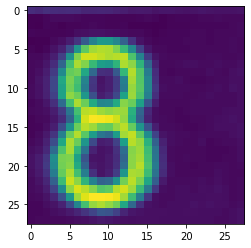

In [48]:
test = [[70,68,71,70,69,70,69,66,66,67,66,64,63,60,61,60,58,59,59,58,57,58,59,58,57,57,57,58],[50,50,52,54,54,54,53,52,52,52,51,51,51,51,52,53,52,50,51,52,52,52,53,53,54,53,53,53],[50,49,52,51,50,51,51,52,53,52,51,51,52,50,50,50,49,50,51,51,51,52,52,52,52,52,53,54],[52,51,51,51,51,52,55,56,57,57,56,55,54,53,53,51,50,51,52,52,52,53,53,52,53,53,53,54],[49,50,50,53,56,62,74,97,122,138,137,125,100,73,57,53,51,52,52,52,53,53,53,52,53,53,54,53],[51,50,52,57,64,86,135,173,191,195,194,182,161,127,82,59,53,53,52,52,52,53,53,53,53,53,54,53],[53,53,56,63,80,132,182,203,203,198,194,196,198,168,123,77,58,54,53,53,53,53,53,54,54,53,53,54],[53,54,59,70,103,164,193,183,160,141,137,156,194,185,156,102,64,53,53,54,55,55,54,54,55,54,54,56],[53,56,62,78,128,175,179,148,105,71,70,95,159,195,169,118,70,53,52,53,53,53,53,55,54,53,56,57],[53,58,65,84,148,180,166,123,76,58,63,77,120,192,170,125,72,54,54,55,53,52,52,53,54,54,56,56],[54,57,65,85,144,178,163,118,74,59,63,78,117,188,171,125,75,55,54,54,54,53,53,54,55,54,57,56],[54,57,64,81,144,186,177,136,89,62,68,85,144,189,167,120,71,54,54,54,53,53,54,55,54,54,54,56],[52,54,59,71,107,164,193,177,149,124,126,149,184,176,143,92,62,53,53,53,53,54,54,54,54,54,54,56],[53,54,56,62,78,114,165,196,199,190,186,189,189,154,103,68,55,53,53,52,53,54,54,54,54,55,56,56],[51,53,54,59,69,101,155,203,213,212,210,202,187,150,98,65,55,54,53,52,52,53,53,54,55,56,57,56],[51,52,56,63,88,133,177,196,190,177,175,188,197,175,135,91,63,54,54,53,52,52,53,54,56,56,56,57],[51,54,60,74,121,176,195,172,140,113,107,140,191,199,174,129,82,58,55,54,54,53,54,54,54,54,56,57],[53,55,64,88,148,193,176,136,86,62,64,81,142,196,188,155,100,64,55,54,53,53,55,52,53,54,54,56],[55,58,68,107,168,192,158,112,65,57,59,72,108,184,190,162,111,68,54,53,53,53,53,52,52,52,53,55],[57,62,75,130,180,182,143,91,58,57,61,70,103,185,192,165,113,70,54,53,54,53,53,52,52,53,53,55],[57,62,77,127,179,184,149,101,61,58,61,71,108,185,196,167,117,71,55,53,53,52,53,53,54,54,53,54],[56,61,73,118,175,193,164,119,72,58,63,79,135,193,191,162,111,69,55,53,53,53,53,53,55,54,53,53],[54,58,67,100,162,201,185,156,122,101,105,133,179,197,181,146,98,61,54,54,54,54,55,54,56,54,53,54],[54,56,62,82,129,186,204,196,184,170,173,195,203,190,160,116,76,55,54,55,55,54,56,55,57,55,53,54],[53,54,58,67,91,138,189,206,214,214,213,209,191,162,118,75,56,54,54,55,55,55,55,56,56,55,53,54],[52,52,55,58,65,86,124,165,188,194,187,178,148,105,72,57,55,54,55,55,55,57,56,57,56,56,54,55],[52,52,53,55,57,61,66,74,83,94,91,81,66,59,57,56,56,56,55,55,56,56,55,55,55,54,55,57],[52,53,53,53,53,54,55,56,58,60,59,57,56,55,56,56,56,55,55,55,55,55,55,55,54,54,55,57]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[4.8759654e-07 7.3601501e-07 1.3235162e-06 2.5403611e-05 9.9790573e-01
  3.1094867e-05 1.3845405e-08 3.9950322e-07 2.0349654e-03]]
0.99790573
5


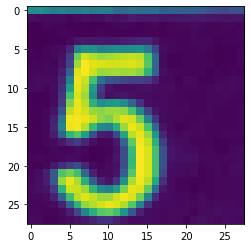

In [49]:
test = [[145,147,142,134,137,133,133,136,130,134,133,120,119,123,121,122,121,111,113,113,112,113,109,103,100,98,102,102],[66,64,64,64,64,62,64,66,64,65,68,67,68,72,70,70,71,69,69,70,71,71,71,69,69,68,68,69],[60,61,63,62,62,60,61,61,60,61,61,62,63,62,61,62,63,61,62,63,63,64,63,62,62,63,63,62],[60,60,61,61,62,62,61,61,61,62,61,61,61,61,61,62,62,60,62,62,62,63,62,62,62,62,62,63],[60,60,60,61,61,63,68,71,70,70,70,70,72,74,77,77,69,63,63,62,62,63,63,63,61,62,62,62],[61,60,62,63,65,78,135,149,145,135,139,143,142,146,148,130,95,65,63,62,62,62,63,62,60,61,61,62],[62,61,62,63,67,90,193,221,213,206,209,213,215,218,216,184,118,64,61,60,62,62,62,61,60,61,61,63],[62,62,63,62,68,94,207,232,225,223,222,222,222,223,220,187,117,64,61,61,62,62,62,62,60,61,61,62],[63,63,63,63,72,113,224,231,220,206,208,209,208,209,203,172,113,66,63,62,62,62,62,59,62,61,62,61],[63,64,64,64,78,136,228,220,182,124,104,100,96,92,92,88,75,63,63,61,64,63,61,61,63,63,64,63],[64,64,62,65,82,158,227,214,153,88,68,65,65,65,67,67,65,64,64,62,63,63,62,63,64,63,64,63],[61,60,61,64,86,180,223,208,146,83,66,68,68,67,65,64,63,64,63,62,62,62,62,63,63,64,63,62],[61,61,61,65,90,199,227,215,171,145,151,155,141,116,84,66,64,64,63,62,63,62,62,63,63,63,62,62],[61,61,63,68,103,216,228,221,206,202,206,207,204,183,138,93,68,64,63,63,63,62,62,63,62,62,62,63],[61,61,63,74,126,229,230,228,221,204,198,212,225,222,193,138,85,65,63,63,62,62,63,63,62,62,62,63],[60,61,63,78,139,228,230,215,176,141,136,167,207,228,220,183,118,68,63,61,62,63,63,62,62,62,62,63],[61,61,63,72,115,173,187,158,100,72,71,97,162,216,227,207,151,78,64,63,65,63,63,62,62,63,63,63],[61,61,63,64,71,83,90,78,66,62,63,70,117,190,230,218,171,91,67,65,64,62,62,62,60,61,62,62],[61,61,61,63,62,62,64,63,61,61,62,67,100,177,233,224,182,102,68,66,64,64,62,63,61,61,63,64],[62,63,62,62,63,65,64,62,60,61,63,68,99,175,232,223,181,103,69,66,67,67,63,63,63,63,63,64],[61,61,63,70,81,91,100,78,64,62,64,67,99,176,232,223,181,102,66,65,64,65,62,63,63,62,64,65],[62,65,74,108,185,196,180,119,75,64,64,68,111,187,231,223,180,96,65,64,63,64,61,62,63,62,64,64],[63,66,73,107,207,227,211,169,111,76,68,85,148,211,230,216,164,83,65,62,62,61,61,62,63,63,63,63],[64,66,69,90,172,220,219,208,173,142,134,157,198,227,223,190,121,70,64,62,62,60,62,62,63,63,63,63],[63,63,65,75,117,180,214,225,217,207,207,220,229,224,196,138,80,65,64,63,63,62,64,62,63,63,63,63],[62,62,63,65,75,118,172,205,213,222,228,224,212,187,137,84,66,64,64,63,64,63,64,63,65,64,64,63],[63,63,62,62,64,72,96,138,169,188,191,182,149,106,75,65,64,63,64,64,64,62,64,65,66,65,65,65],[64,63,61,61,63,64,67,71,76,83,83,75,68,64,64,65,64,63,64,64,61,65,67,65,63,65,64,63]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)

(28, 28)
(1, 28, 28, 1)
[[4.9666751e-09 1.2649760e-07 9.9999690e-01 1.4877875e-11 2.9502323e-06
  1.5865153e-13 1.0955249e-10 7.7093407e-09 3.9502948e-10]]
0.9999969
3


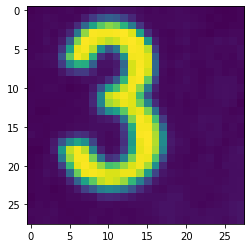

In [50]:
test = [[83,84,85,84,85,86,84,85,87,90,92,91,89,89,87,85,86,85,86,87,86,85,85,84,83,82,83,84],[84,85,87,86,85,85,86,95,110,125,132,128,115,100,89,86,86,86,86,87,87,86,85,83,84,83,83,84],[85,85,86,87,86,89,102,137,176,203,216,210,186,150,108,89,86,86,87,87,88,87,86,84,83,83,84,84],[84,85,87,85,88,99,147,218,244,243,243,244,245,237,176,104,88,85,84,86,87,85,84,83,85,85,86,86],[84,85,88,86,93,129,213,244,242,236,228,233,243,245,241,168,96,86,85,87,88,85,86,86,88,87,88,86],[85,85,86,87,106,173,239,243,228,164,126,148,221,244,243,228,110,86,84,85,86,85,86,87,86,86,86,88],[85,87,88,88,123,206,243,236,187,104,94,105,163,242,243,238,129,87,85,86,88,86,86,87,85,86,85,88],[86,86,87,88,110,159,185,183,132,90,90,94,137,235,244,238,137,88,86,88,87,85,85,87,87,85,85,86],[85,85,85,85,91,103,109,110,97,88,88,95,144,235,245,234,136,87,84,86,87,86,84,85,87,85,86,85],[84,85,85,85,86,85,86,89,89,91,103,129,189,242,244,205,115,86,85,86,88,86,84,86,88,88,88,85],[84,85,86,86,85,83,84,85,93,124,173,197,230,243,218,151,97,86,86,87,87,86,85,87,88,89,88,87],[85,85,85,85,85,85,85,86,99,158,230,239,243,237,195,121,91,86,85,87,85,86,85,87,88,89,88,85],[85,84,84,84,84,85,86,86,100,156,222,230,240,237,210,156,103,87,85,86,84,85,86,86,87,88,87,83],[85,83,83,84,85,85,85,86,93,127,161,174,204,236,240,213,143,92,86,86,85,85,87,87,87,86,84,85],[84,84,85,85,85,85,86,86,88,91,94,103,144,215,244,239,196,109,87,86,86,86,89,88,88,86,86,87],[85,85,84,85,85,86,87,87,88,88,88,89,112,182,243,243,217,138,89,86,86,87,88,87,88,85,87,85],[87,85,84,87,92,99,106,103,93,88,86,88,107,173,244,245,225,159,92,87,86,86,87,88,88,86,86,85],[84,84,85,93,124,158,177,163,116,88,86,87,105,171,240,245,226,160,93,89,87,84,86,88,87,84,86,87],[82,82,85,95,169,230,243,228,154,97,87,90,111,177,239,244,223,153,91,87,87,84,85,86,85,86,88,90],[83,84,87,89,149,220,243,243,211,144,104,109,153,212,242,241,200,122,88,86,85,84,87,88,85,87,89,89],[83,84,87,87,112,191,239,244,239,219,197,201,219,236,242,223,162,99,86,86,85,86,87,87,85,88,88,89],[84,85,88,87,92,137,208,241,243,241,236,236,240,240,223,171,116,92,88,87,86,87,87,86,86,86,88,88],[84,85,86,85,86,99,134,176,204,229,236,232,220,190,151,116,94,88,87,86,86,86,87,87,86,87,88,89],[84,85,85,83,84,87,94,113,129,151,157,153,142,124,103,92,87,86,88,88,87,86,86,86,87,88,88,89],[83,85,85,84,84,86,86,88,89,98,100,99,96,92,89,88,88,88,90,90,87,86,86,85,86,87,89,89],[84,86,85,86,84,85,85,85,85,87,87,86,86,87,87,87,89,90,90,89,88,86,85,86,87,88,90,91],[86,86,86,87,85,84,85,85,86,86,85,86,85,85,86,87,88,90,90,89,88,88,87,88,88,88,90,91],[85,86,87,86,85,85,84,85,87,85,85,86,86,85,86,86,87,89,90,88,87,88,88,89,88,87,89,91]]

numpyArray = np.array(test)
print(numpyArray.shape)

numpyArray = numpyArray[np.newaxis, :, :, np.newaxis] / 255
print(numpyArray.shape)
plt.imshow(numpyArray[0])

prob = model.predict(numpyArray);
ans = np.argmax(prob) + 1;
print(prob)
print(np.max(prob))
print(ans)